<a href="https://colab.research.google.com/github/GureevRoman/GRS-Project0/blob/main/SBER_TEST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#импорт библиотек
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

from sklearn import linear_model #линейные модели
from sklearn import tree #деревья решений
from sklearn import ensemble #ансамбли
from sklearn import metrics #метрики
from sklearn import preprocessing #предобработка
from sklearn.model_selection import train_test_split #сплитование выборки

%matplotlib inline
plt.style.use('seaborn')

In [2]:
url1='https://drive.google.com/file/d/1aUusYhPrHPYT9GcHsx7KJX6k4eg7ORT-/view?usp=share_link'
path1 = 'https://drive.google.com/uc?export=download&id='+url1.split('/')[-2]
person = pd.read_csv(path1)
person.head(2)

Unnamed: 0   person_id  char_1      group_1  char_2        date   char_3  \
0           0     ppl_100  type 2  group 17304  type 2  2021-06-29   type 5   
1           1  ppl_100002  type 2   group 8688  type 3  2021-01-06  type 28   

   char_4  char_5  char_6  ... char_29 char_30 char_31  char_32  char_33  \
0  type 5  type 5  type 3  ...   False    True    True    False    False   
1  type 9  type 5  type 3  ...   False    True    True     True     True   

   char_34  char_35  char_36  char_37  char_38  
0     True     True     True    False       36  
1     True     True     True    False       76  

[2 rows x 42 columns]

In [3]:
url2='https://drive.google.com/file/d/1Antwt8xd727BnjwXILJ88DV3igHUbjpx/view?usp=sharing'
path2='https://drive.google.com/uc?export=download&id='+url2.split('/')[-2]
action_train = pd.read_csv(path2, compression = 'zip')
action_train.head(2)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (5,6,7,8,9,10,11,12,13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Unnamed: 0 person_id     action_id        date action_type char_1 char_2  \
0           0   ppl_100  act2_1734928  2023-08-26      type 4    NaN    NaN   
1           1   ppl_100  act2_2434093  2022-09-27      type 2    NaN    NaN   

  char_3 char_4 char_5 char_6 char_7 char_8 char_9  char_10  result  
0    NaN    NaN    NaN    NaN    NaN    NaN    NaN  type 76       0  
1    NaN    NaN    NaN    NaN    NaN    NaN    NaN   type 1       0

In [4]:
url3='https://drive.google.com/file/d/1jhqNSQ6A_tR2i4F_L1h8bMccOuue1q6t/view?usp=share_link'
path3 = 'https://drive.google.com/uc?export=download&id='+url3.split('/')[-2]
action_test = pd.read_csv(path3)
action_test.head(2)

Unnamed: 0   person_id    action_id        date action_type  char_1  \
0           0  ppl_100004  act1_249281  2022-07-20      type 1  type 5   
1           1  ppl_100004  act2_230855  2022-07-20      type 5     NaN   

    char_2  char_3  char_4  char_5  char_6  char_7  char_8  char_9   char_10  
0  type 10  type 5  type 1  type 6  type 1  type 1  type 7  type 4       NaN  
1      NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  type 682

In [5]:
person.shape

(189118, 42)

In [6]:
person = person.drop('Unnamed: 0', axis=1)

In [7]:
person['date'] = pd.to_datetime(person['date'])

In [8]:
!pip install sweetviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
# для общего анализа
import sweetviz as sv

                                             |          | [  0%]   00:00 -> (? left)


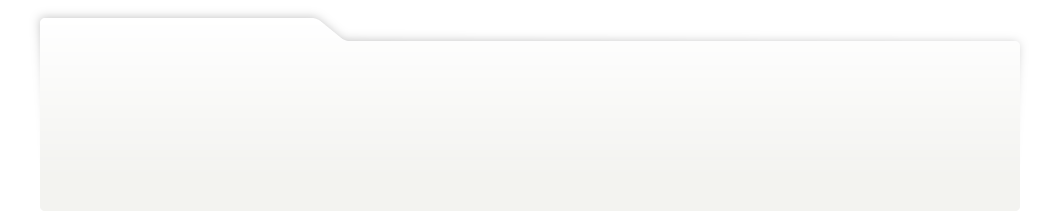
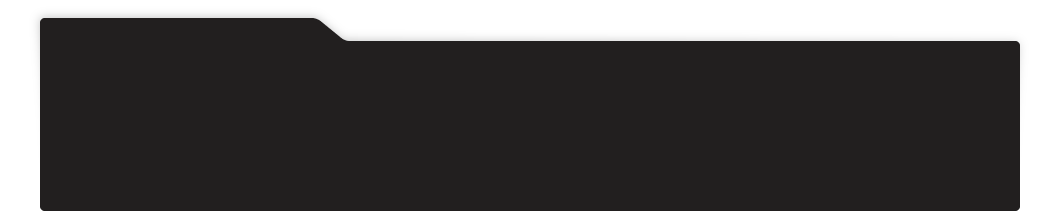
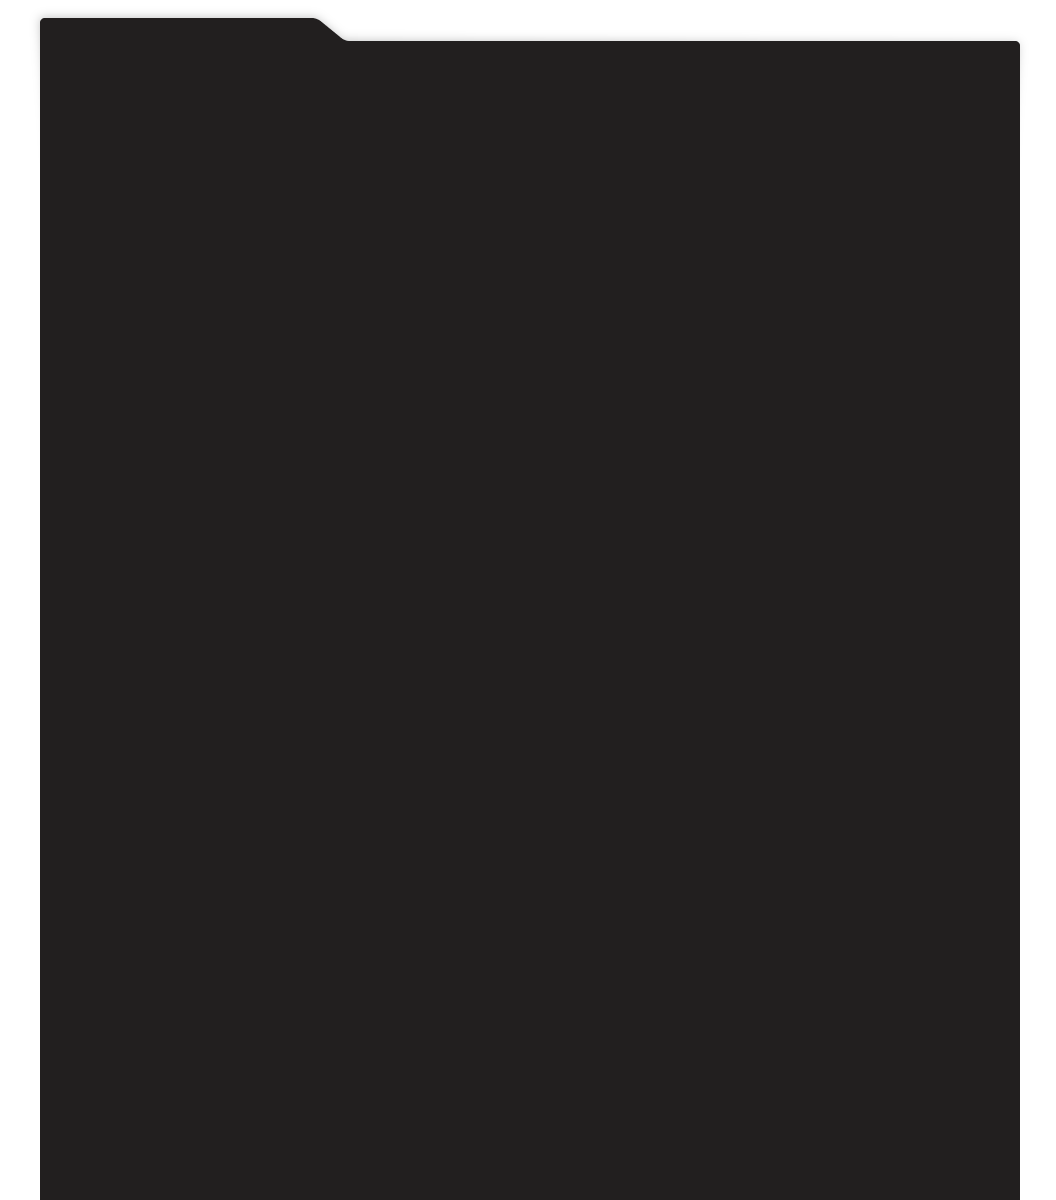
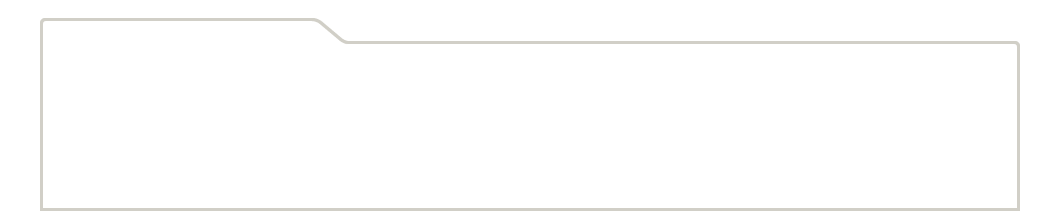
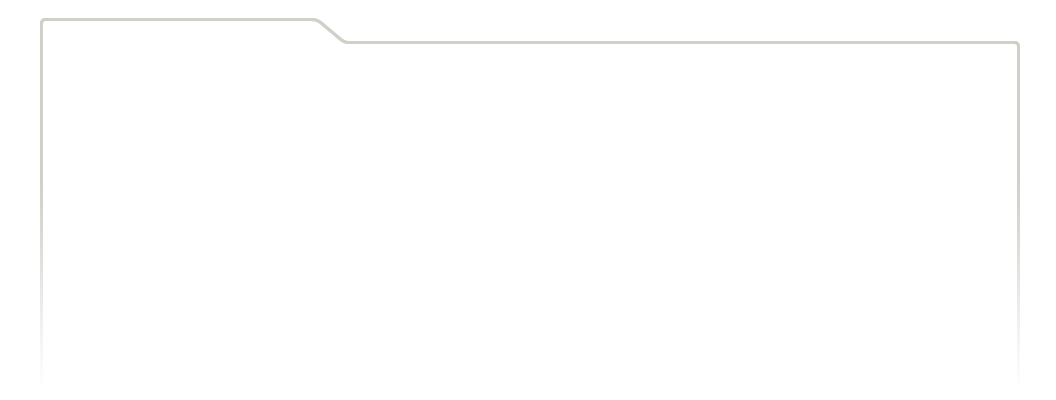
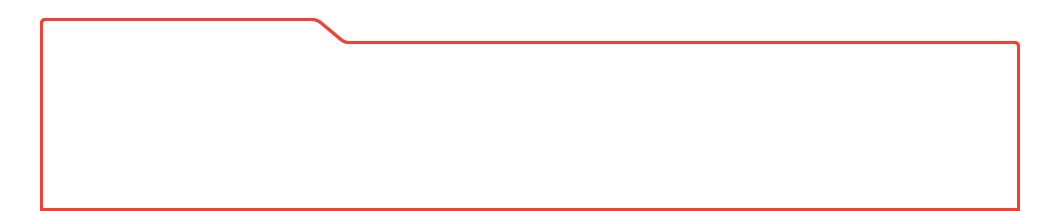
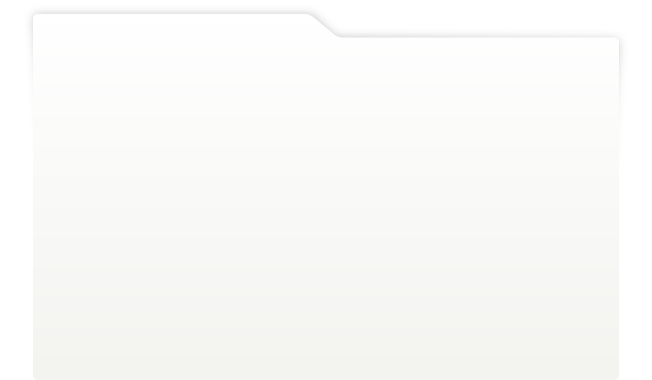
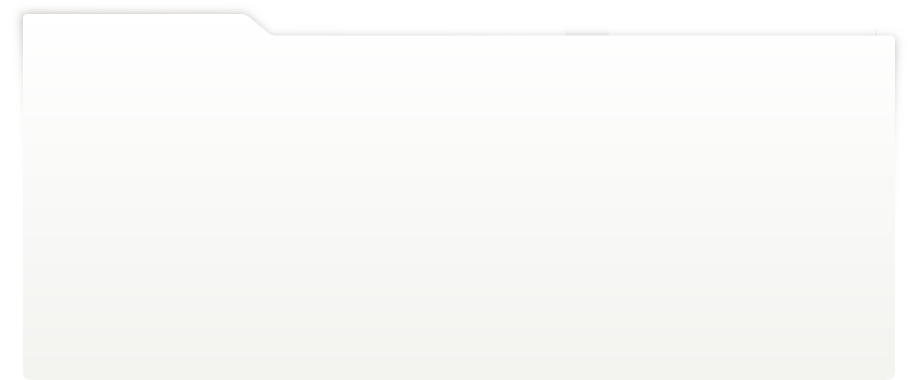
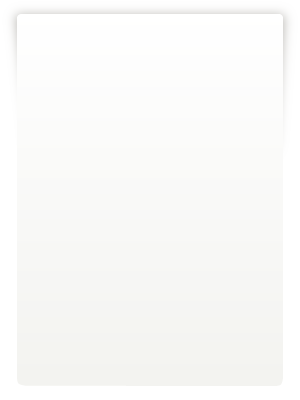
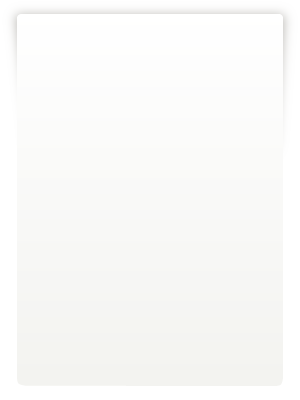
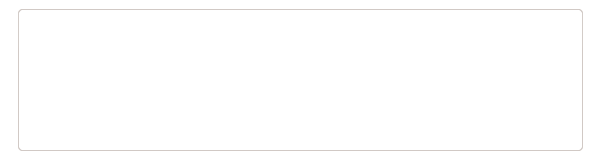
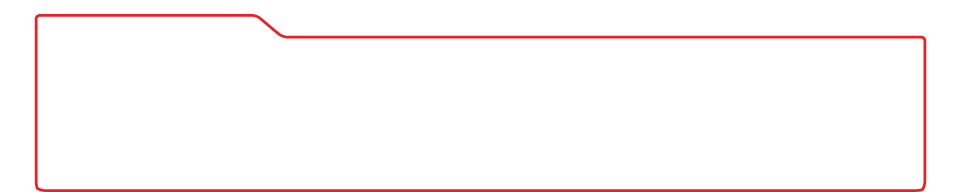
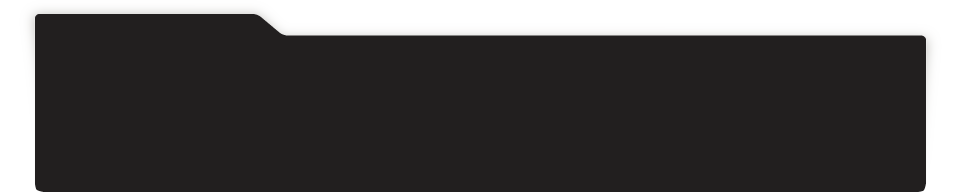
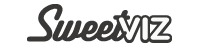
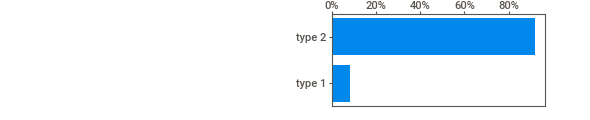
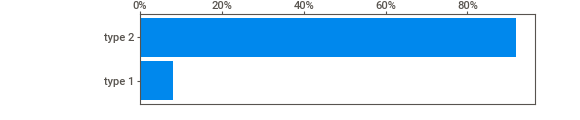
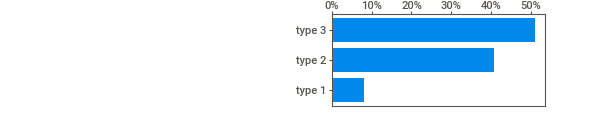
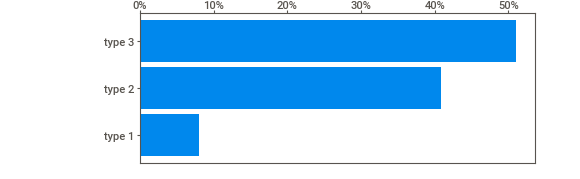
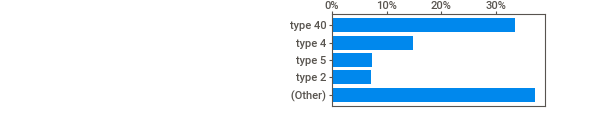
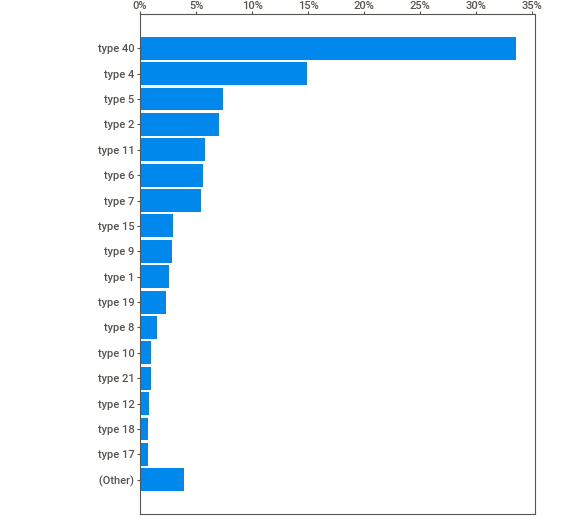
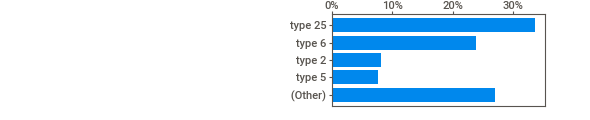
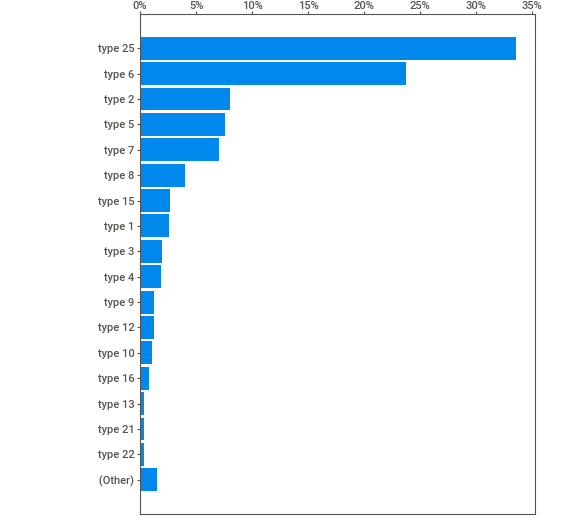
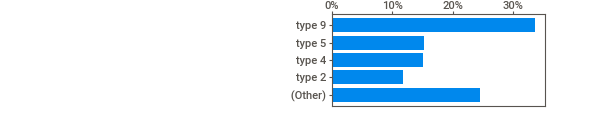
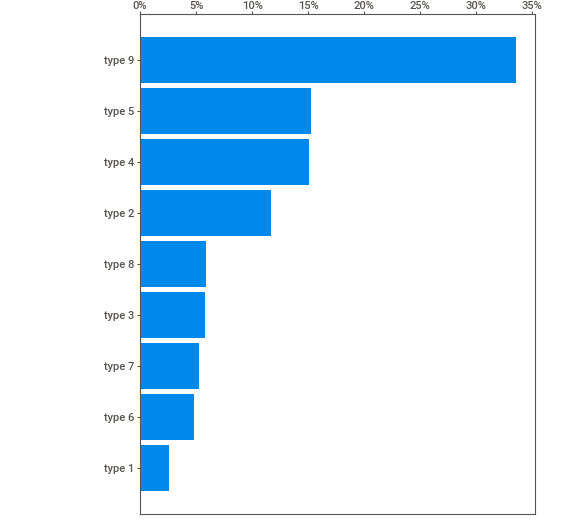
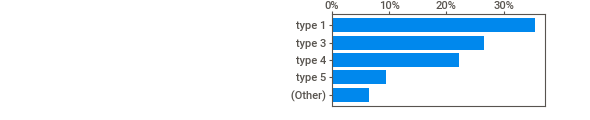
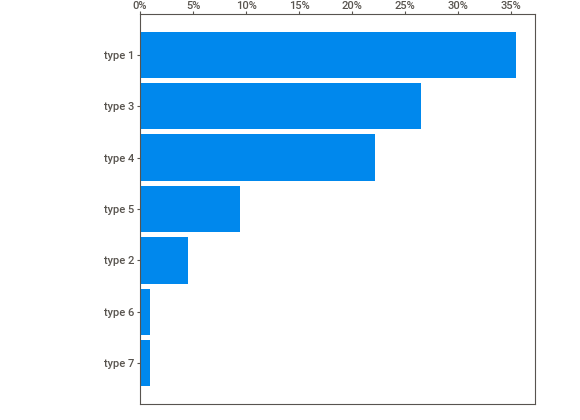
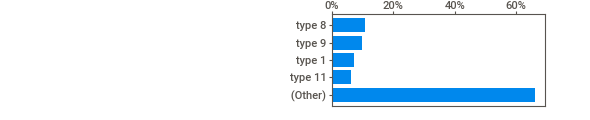
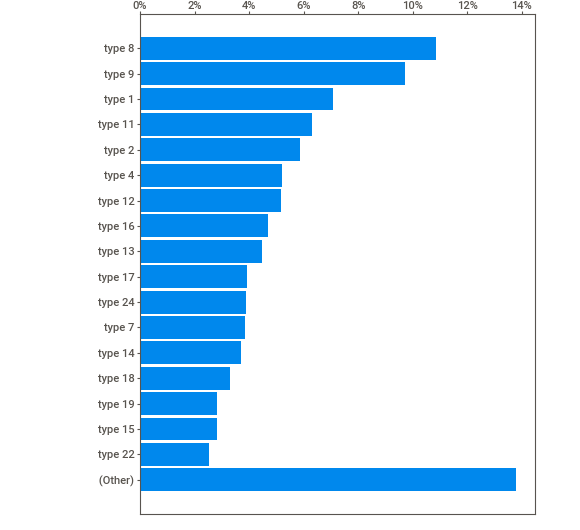
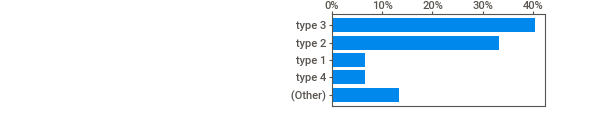
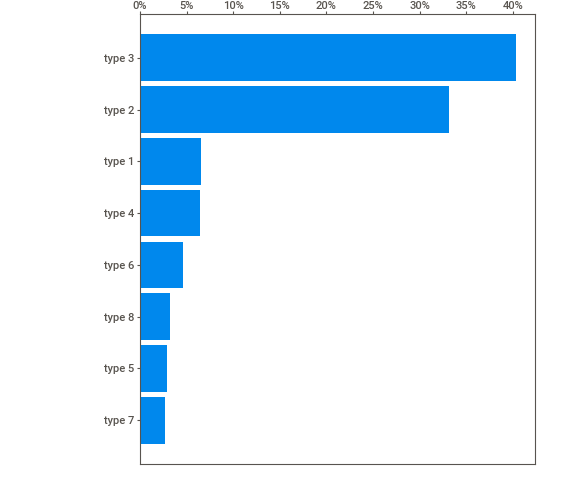
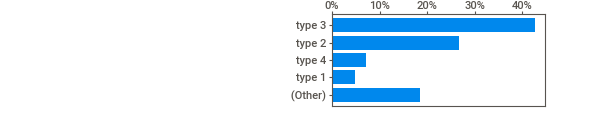
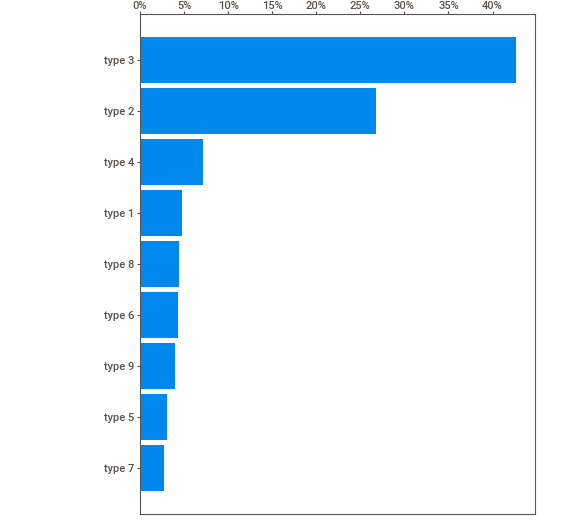
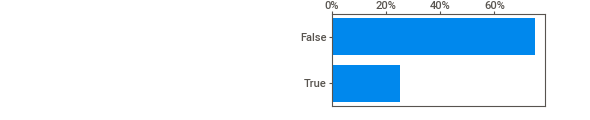
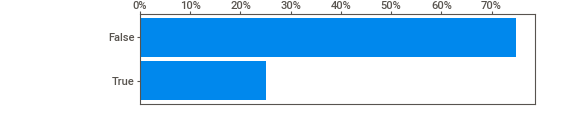
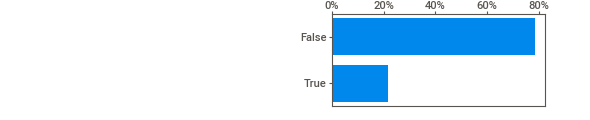
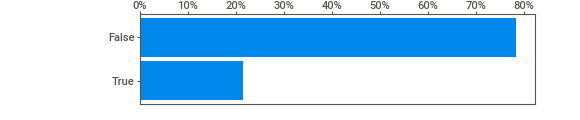
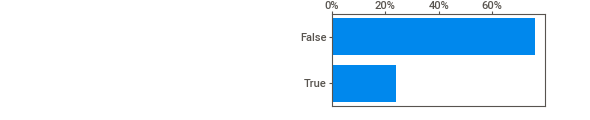
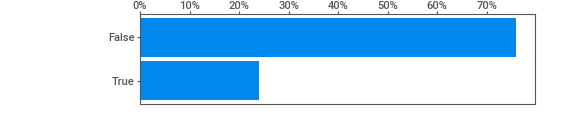
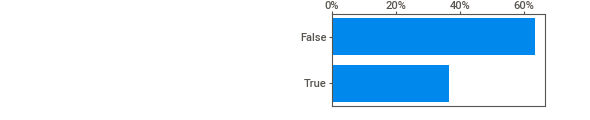
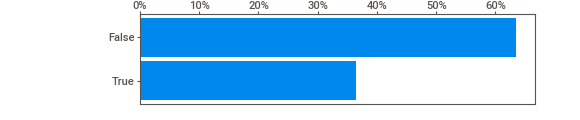
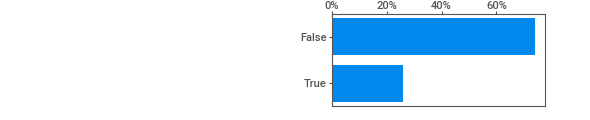
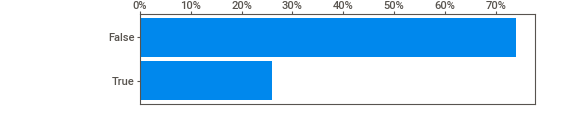
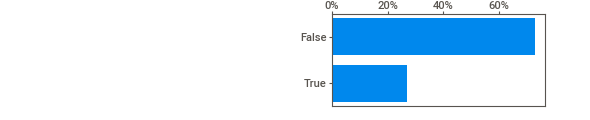
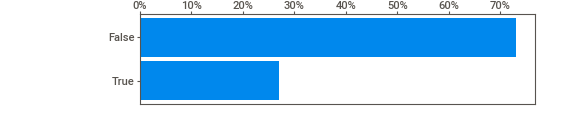
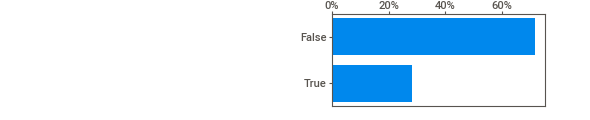
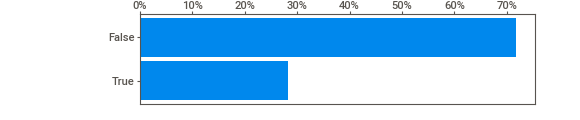
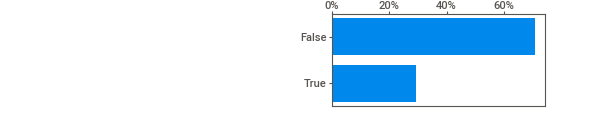
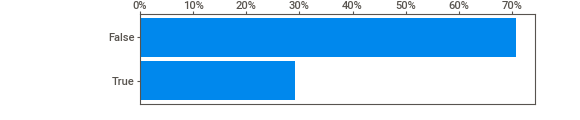
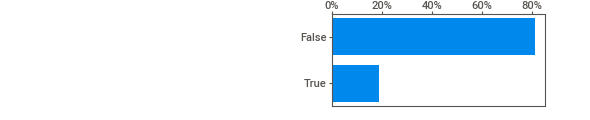
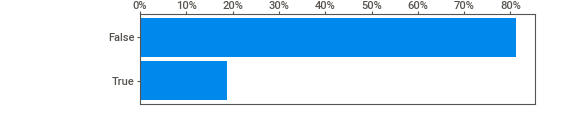
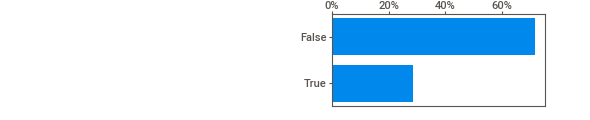
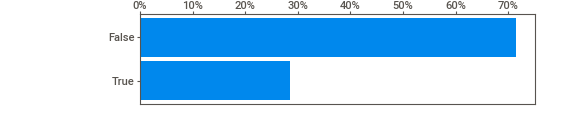
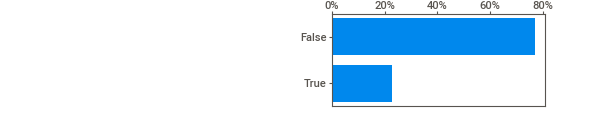
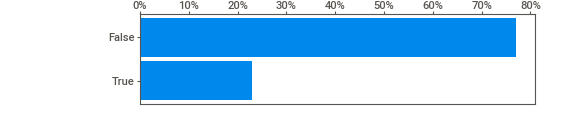
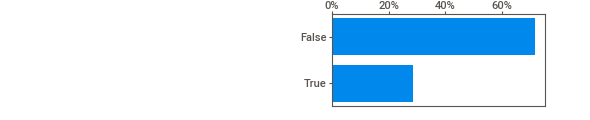
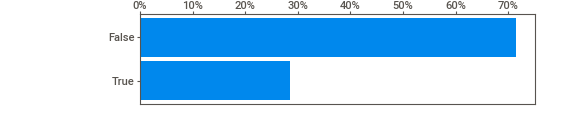
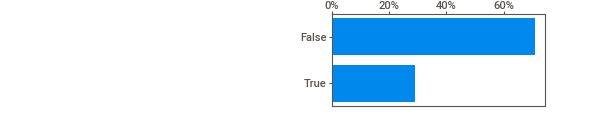
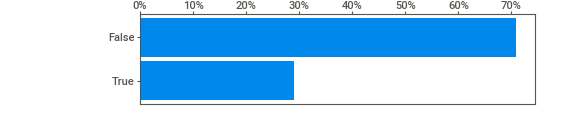
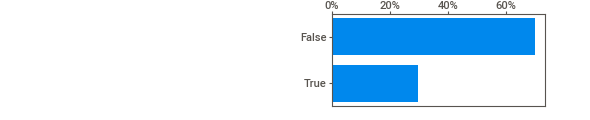
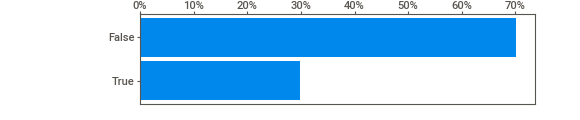
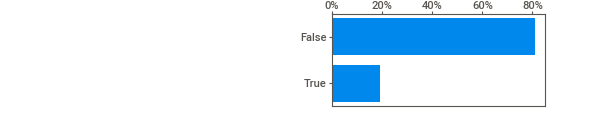
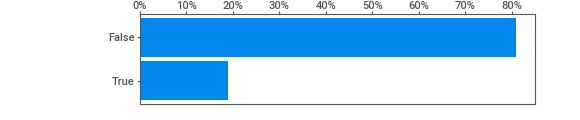
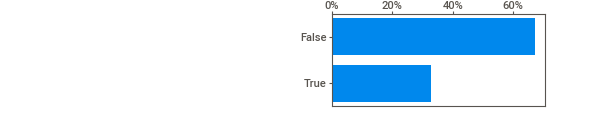
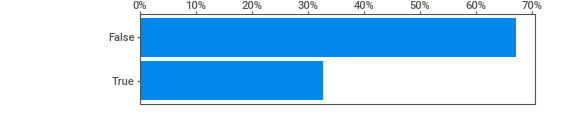
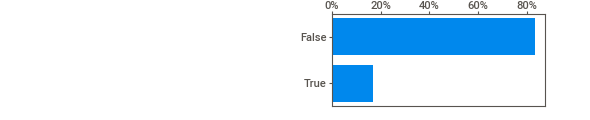
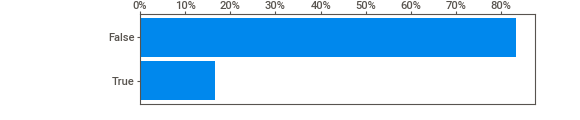
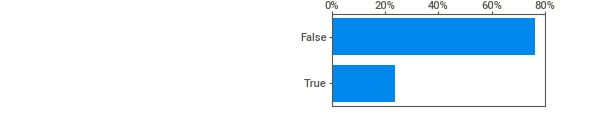
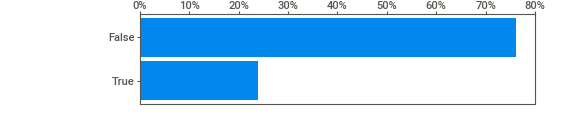
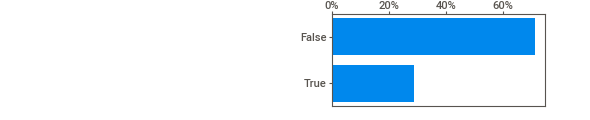
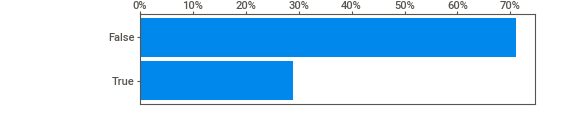
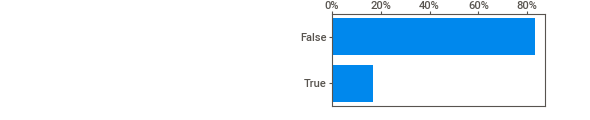
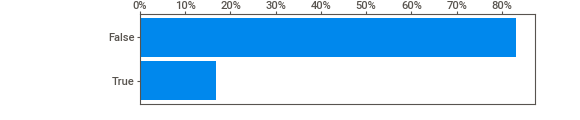
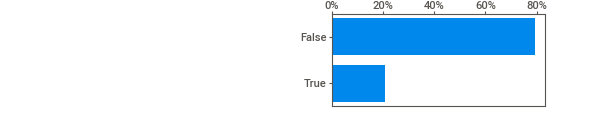
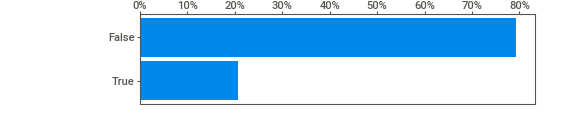
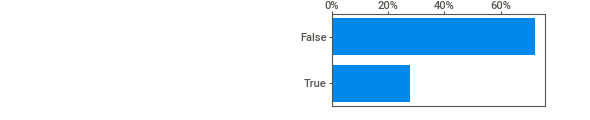
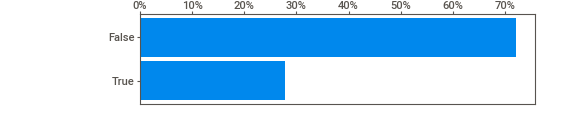
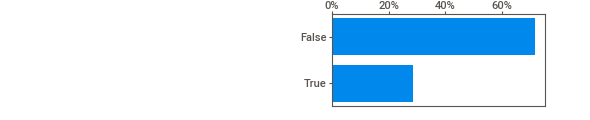
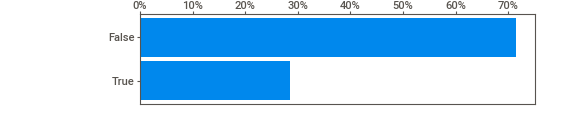
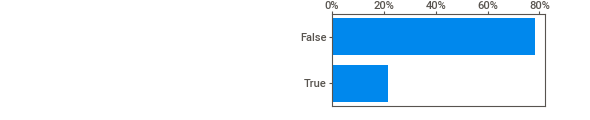
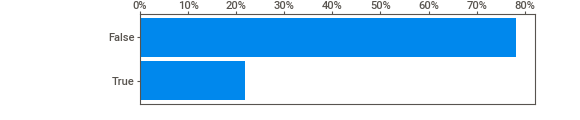
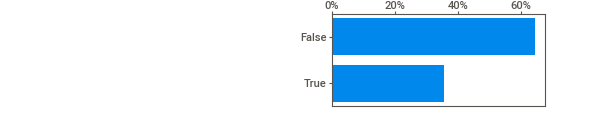
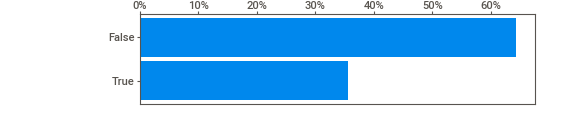
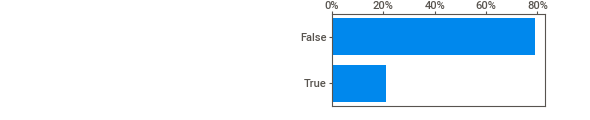
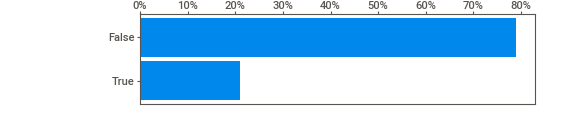
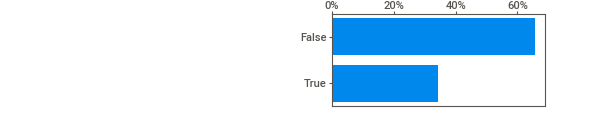
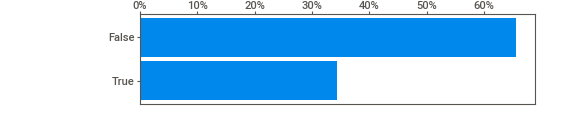
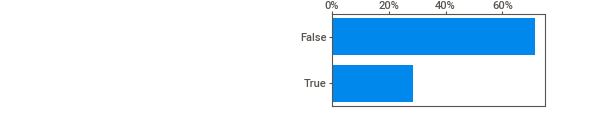
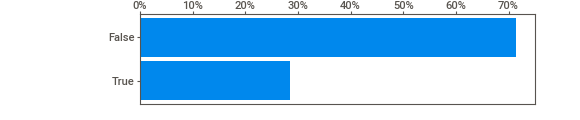
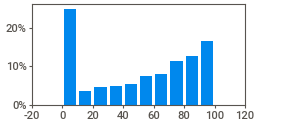
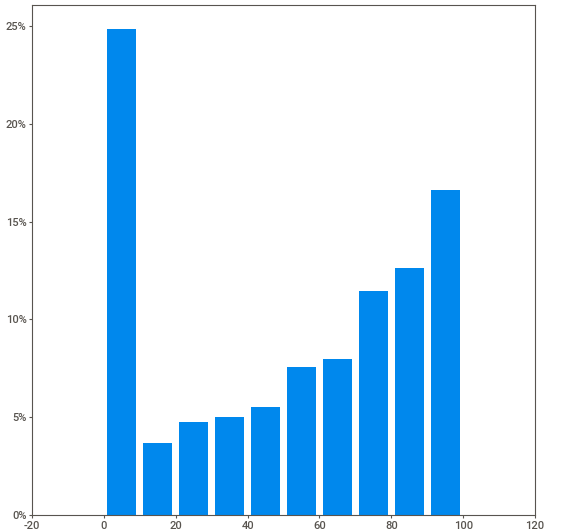
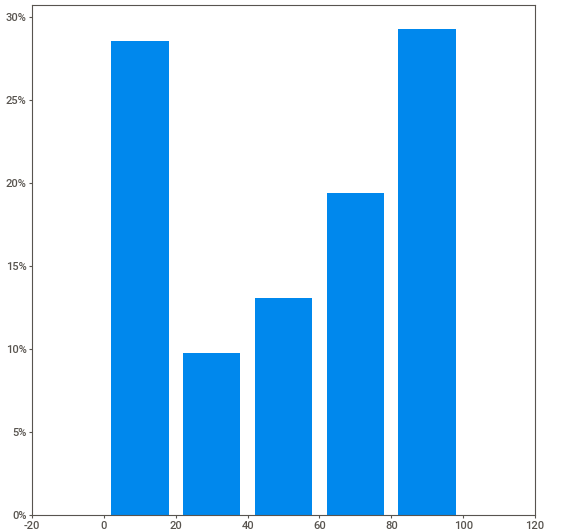
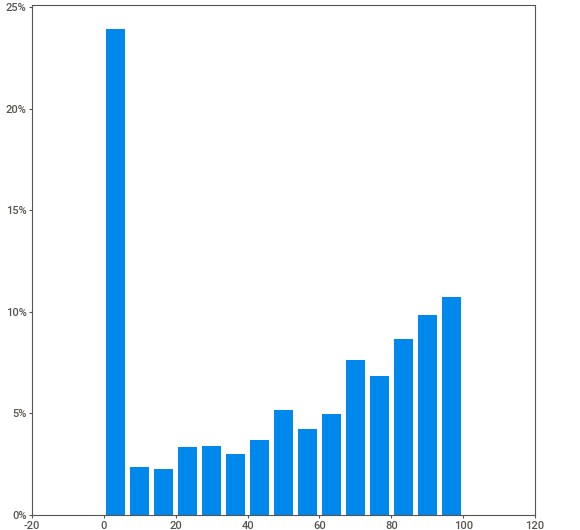
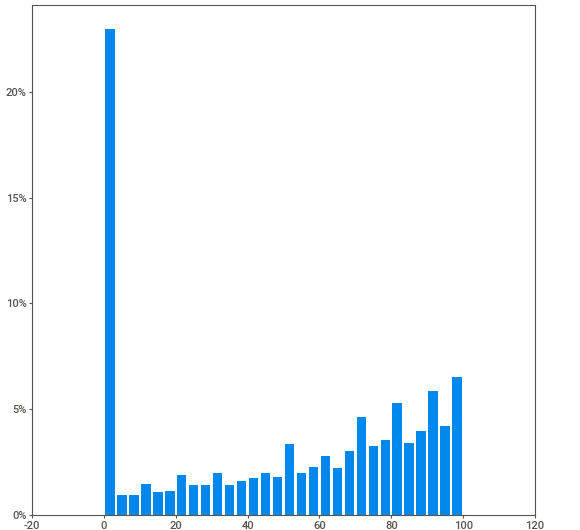
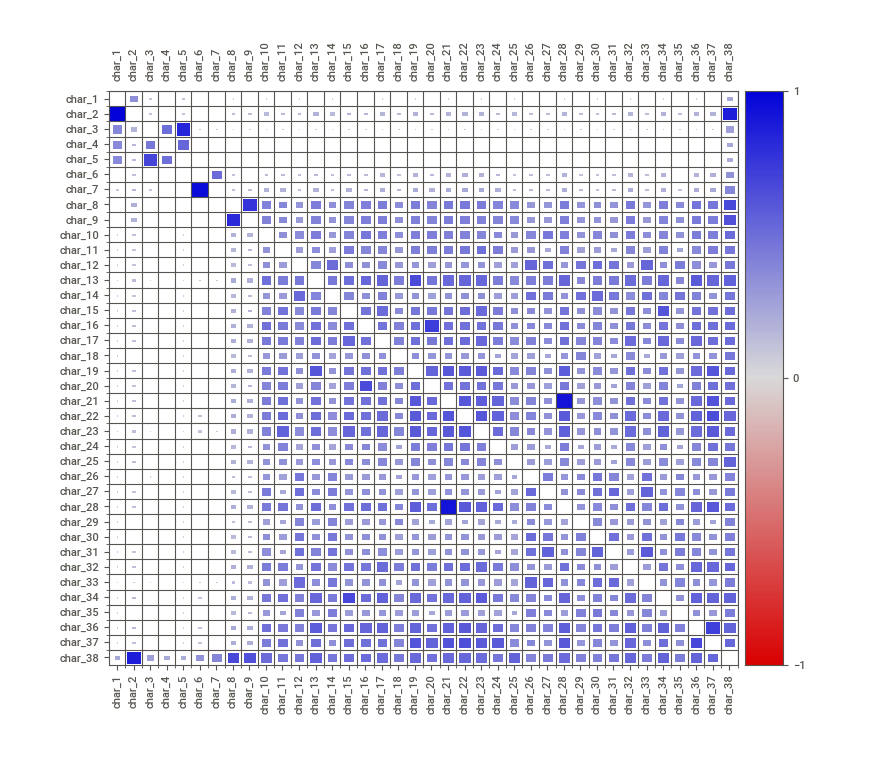
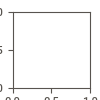

In [10]:
report = sv.analyze(person)
report.show_notebook(w='100%', h = 'full')

### <center> ПРЕДОБРАБОТКА ДАННЫХ

### КОДИРОВАНИЕ ПРИЗНАКОВ ТАБЛИЦЫ PERSON

In [8]:
bool_columns = person.select_dtypes(include = 'bool').columns
for col in bool_columns:
    person[col] = person[col].apply(lambda x: 1 if x == True else 0)

В признаке group_1  большую часть(41%) имеет значение 'group 17304', доли оставшихся значений меньше 1%, а всего уникальных значений 34224(что очень много). Поэтому закодируем значение 'group 17304' единицей, а остальные нулем.

In [9]:
person['group_1'] = person['group_1'].apply(lambda x: 1 if x == 'group 17304' else 0)

In [10]:
columns_to_change_bn = ['char_3', 'char_4', 'char_7']# Список признаков для BinaryEncoding
columns_to_change_ohe = ['char_1', 'char_2', 'char_5', 'char_6', 'char_8', 'char_9']# Списко признаков для OneHotEncoding

In [11]:
from sklearn.preprocessing import OneHotEncoder
 
one_hot_encoder = OneHotEncoder()
 
# 'учим' и сразу применяем преобразование к выборке, результат переводим в массив
data_onehot = one_hot_encoder.fit_transform(person[columns_to_change_ohe]).toarray()
 
# запишем полученные названия новых колонок в отдельную переменную
column_names = one_hot_encoder.get_feature_names(columns_to_change_ohe)

data_onehot = pd.DataFrame(data_onehot, index=person.index, columns=column_names)
person = pd.concat([person, data_onehot], axis = 1)
person = person.drop(columns_to_change_ohe, axis = 1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [12]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
import category_encoders as ce

bin_encoder = ce.BinaryEncoder(cols=columns_to_change_bn) # указываем столбцы для кодирования
type_bin = bin_encoder.fit_transform(person[columns_to_change_bn])
person = pd.concat([person, type_bin], axis=1)

person = person.drop(columns_to_change_bn, axis = 1)

In [14]:
# инициализируем нормализатор MinMaxScaler
mm_scaler = preprocessing.MinMaxScaler()

# преобразовываем столбец
person['char_38'] = mm_scaler.fit_transform(person[['char_38']])

In [16]:
person['char_38']

0         0.36
1         0.76
2         0.99
3         0.76
4         0.84
          ... 
189113    0.89
189114    0.00
189115    0.00
189116    0.95
189117    0.36
Name: char_38, Length: 189118, dtype: float64

In [19]:
person.sample(3)

person_id  group_1       date  char_10  char_11  char_12  char_13  \
136310  ppl_358239        1 2023-03-08        0        0        0        0   
7350    ppl_113966        0 2022-12-17        0        1        1        1   
25971   ppl_149135        1 2022-06-07        1        1        1        1   

        char_14  char_15  char_16  ...  char_4_0  char_4_1  char_4_2  \
136310        0        0        0  ...         0         0         1   
7350          1        1        1  ...         0         0         1   
25971         1        1        1  ...         0         0         1   

        char_4_3  char_4_4  char_7_0  char_7_1  char_7_2  char_7_3  char_7_4  
136310         0         1         0         1         1         1         1  
7350           0         1         1         0         0         0         1  
25971          0         0         1         0         1         0         0  

[3 rows x 86 columns]

### ACTION_TRAIN и ACTION_TEST

In [15]:
action_train.shape

(2197291, 16)

In [16]:
action_test.shape

(498687, 15)

In [17]:
action_train = action_train.drop('Unnamed: 0', axis=1)

In [18]:
action_train['date'] = pd.to_datetime(action_train['date'])

In [19]:
action_train = action_train.rename(columns = {'date':'act_date',
                                              'char_1':'act_char_1',
                                              'char_2':'act_char_2',
                                              'char_3':'act_char_3',
                                              'char_4':'act_char_4',
                                              'char_5':'act_char_5',
                                              'char_6':'act_char_6',
                                              'char_7':'act_char_7',
                                              'char_8':'act_char_8',
                                              'char_9':'act_char_9',
                                              'char_10':'act_char_10'})

                                             |          | [  0%]   00:00 -> (? left)


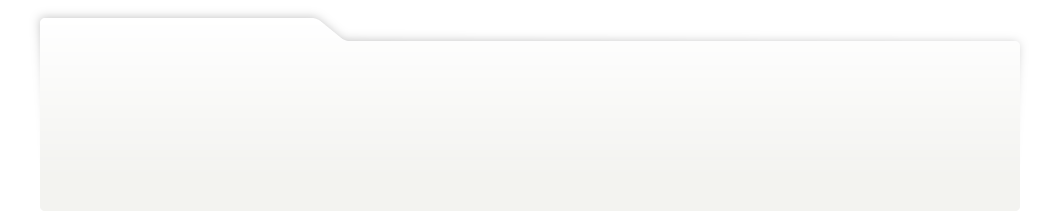
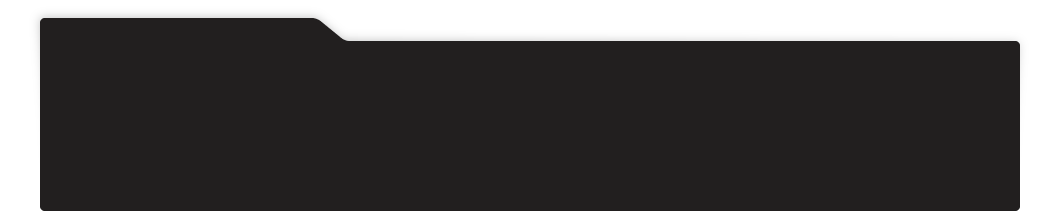
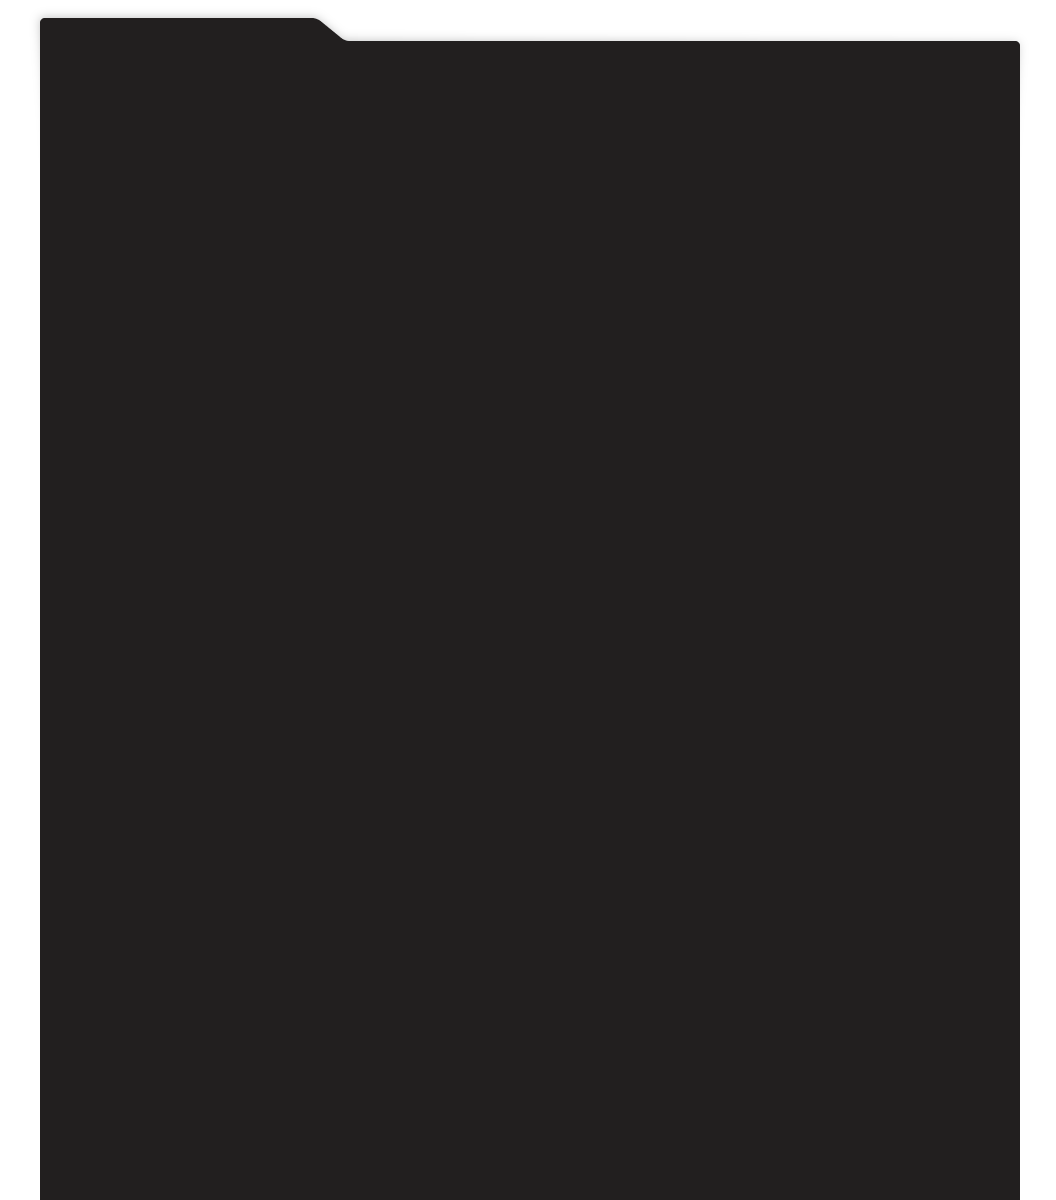
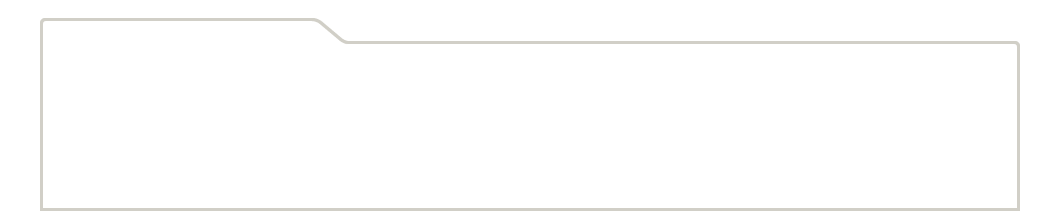
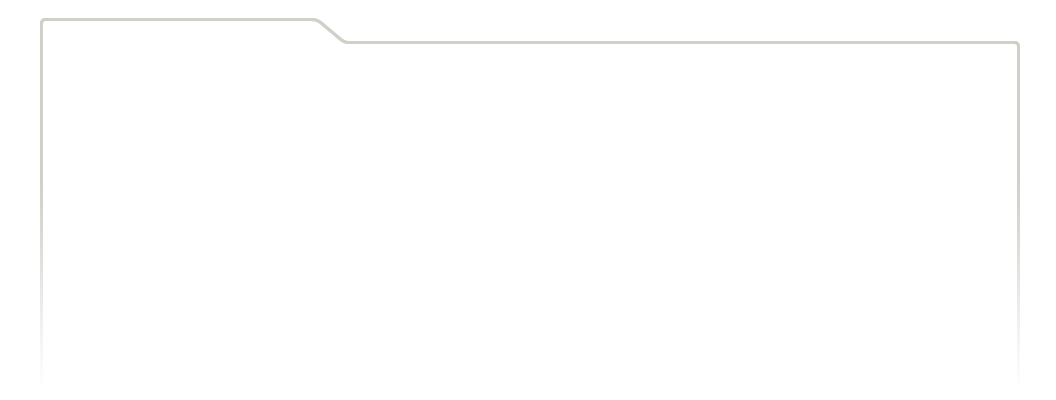
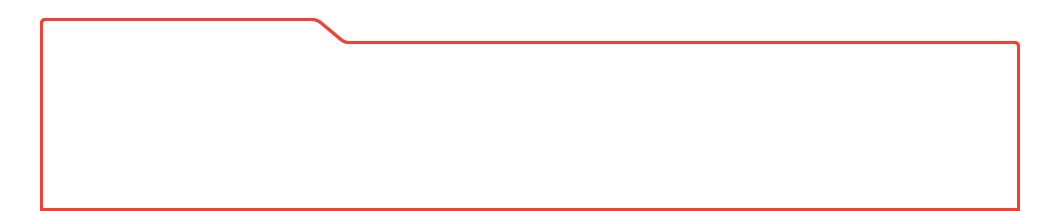
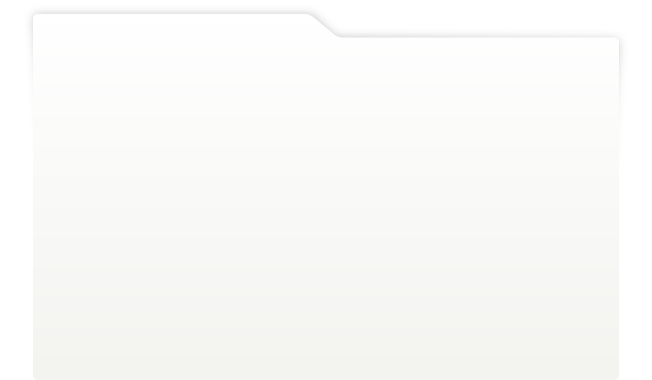
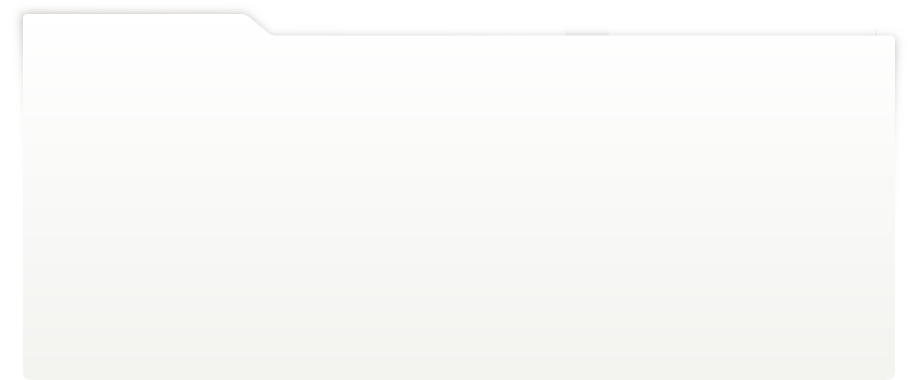
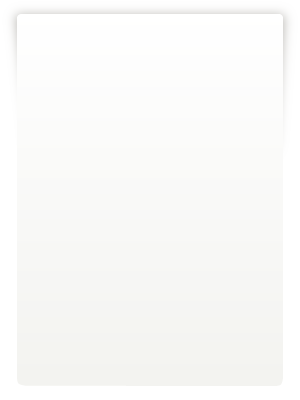
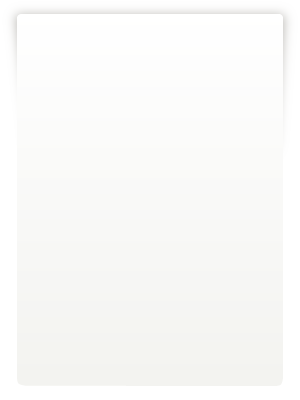
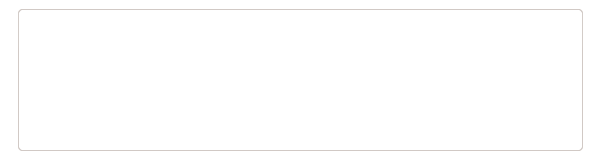
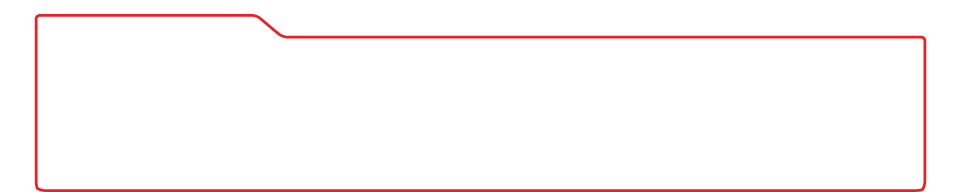
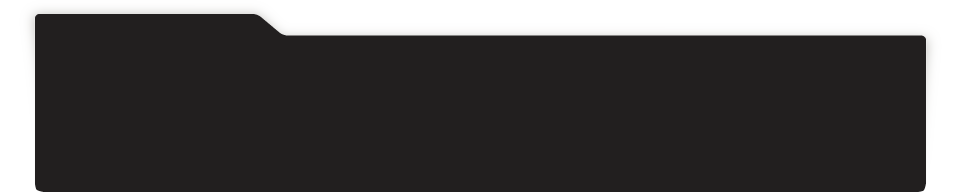
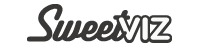
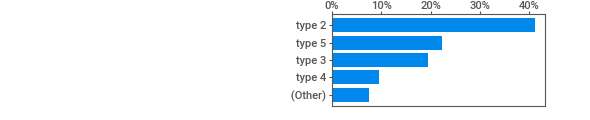
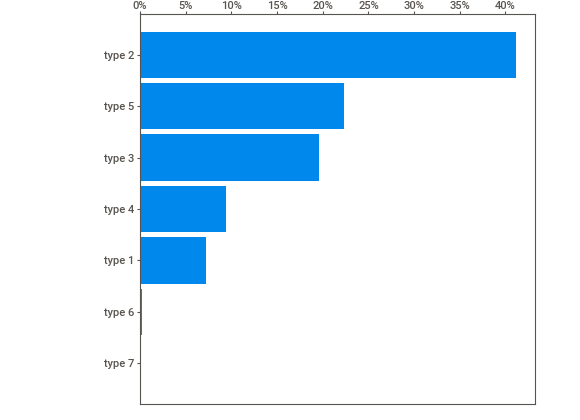
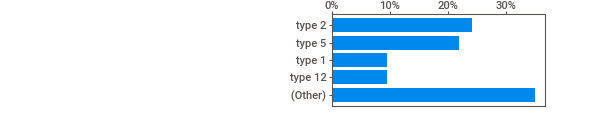
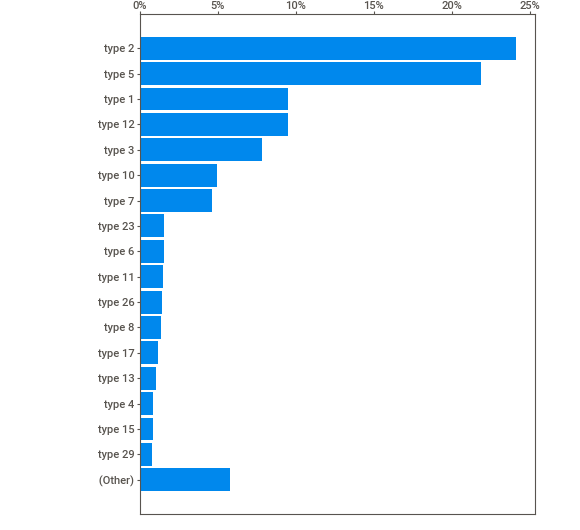
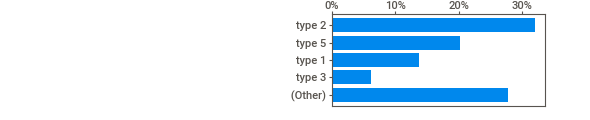
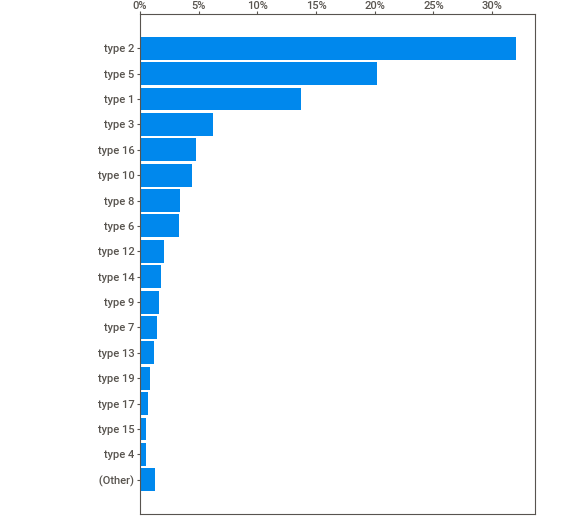
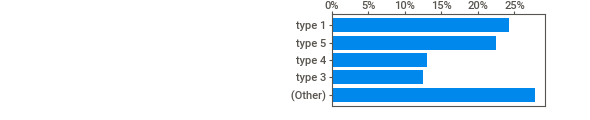
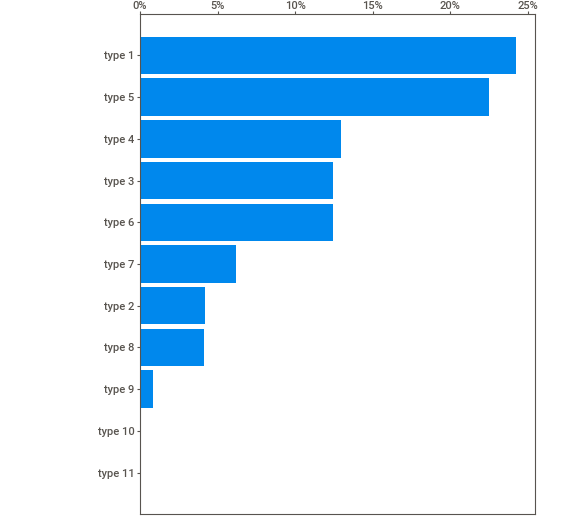
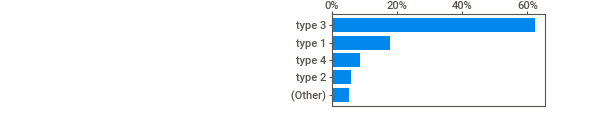
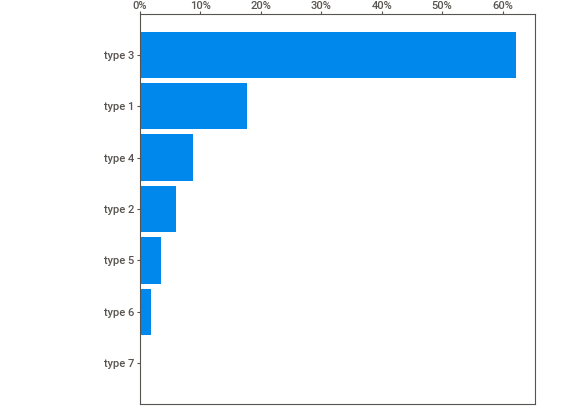
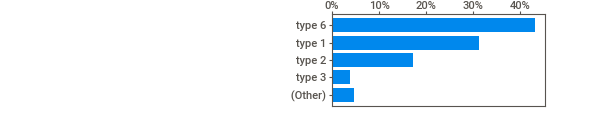
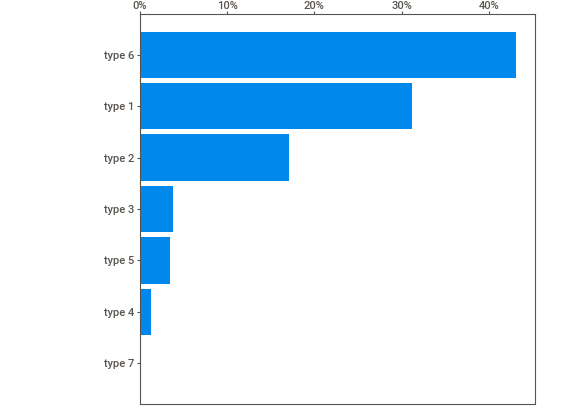
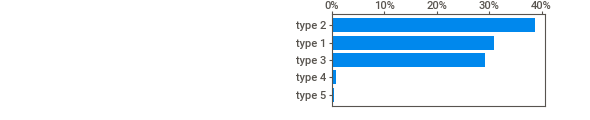
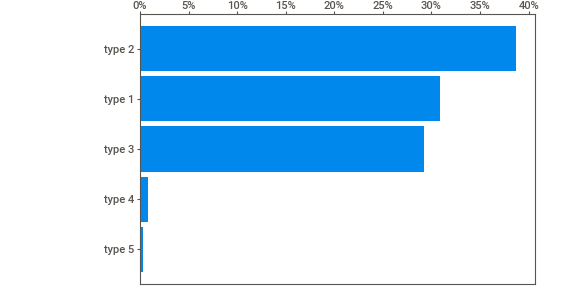
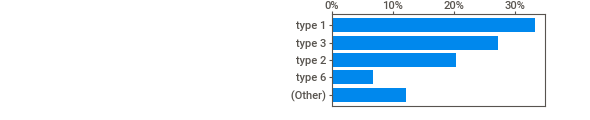
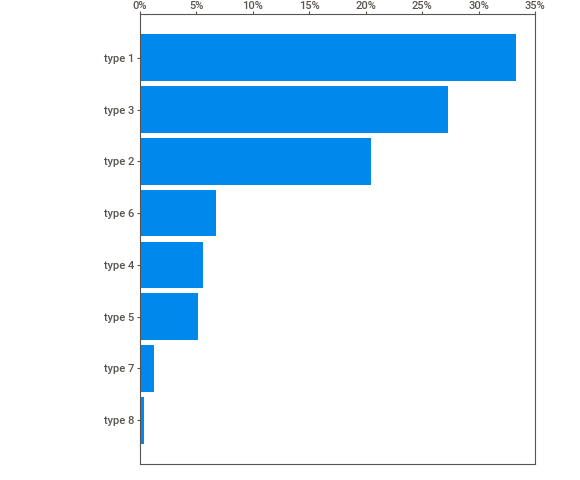
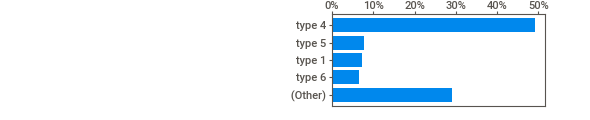
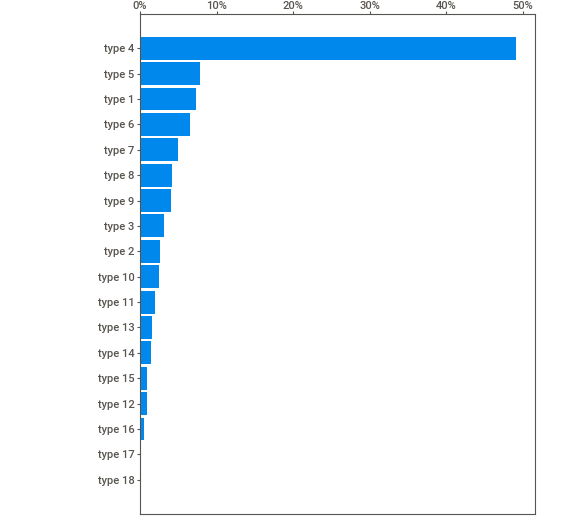
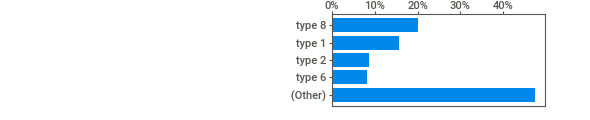
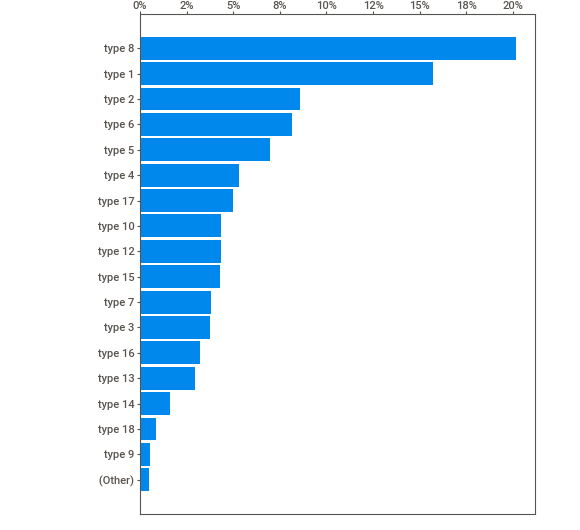
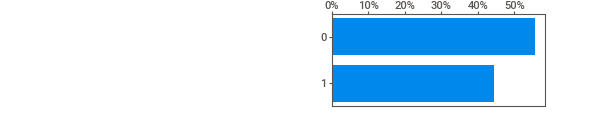
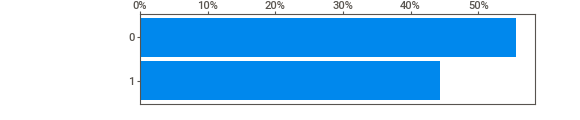
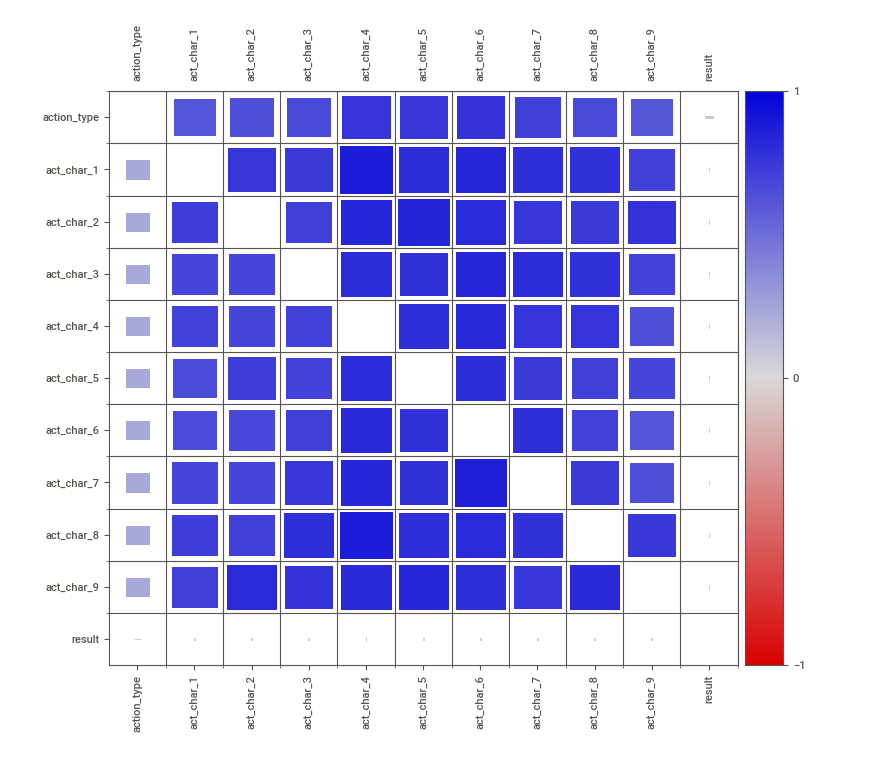
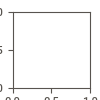

In [25]:
report = sv.analyze(action_train)
report.show_notebook(w='100%', h = 'full')

In [20]:
action_test = action_test.drop('Unnamed: 0', axis=1)

In [21]:
action_test['date'] = pd.to_datetime(action_test['date'])

In [22]:
action_test = action_test.rename(columns = {'date':'act_date',
                                              'char_1':'act_char_1',
                                              'char_2':'act_char_2',
                                              'char_3':'act_char_3',
                                              'char_4':'act_char_4',
                                              'char_5':'act_char_5',
                                              'char_6':'act_char_6',
                                              'char_7':'act_char_7',
                                              'char_8':'act_char_8',
                                              'char_9':'act_char_9',
                                              'char_10':'act_char_10'})

                                             |          | [  0%]   00:00 -> (? left)


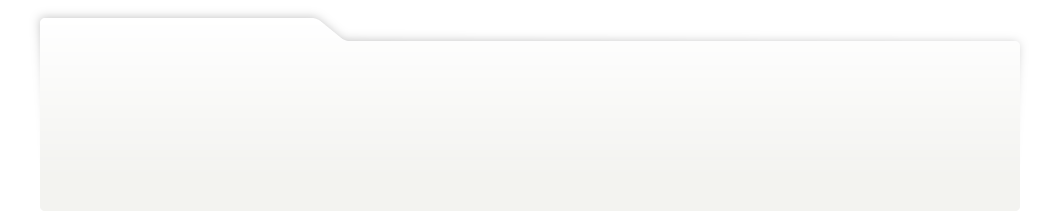
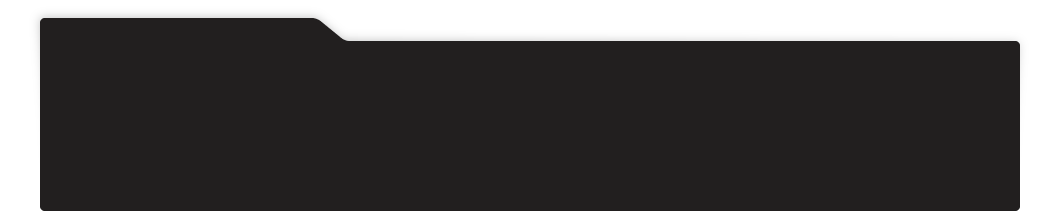
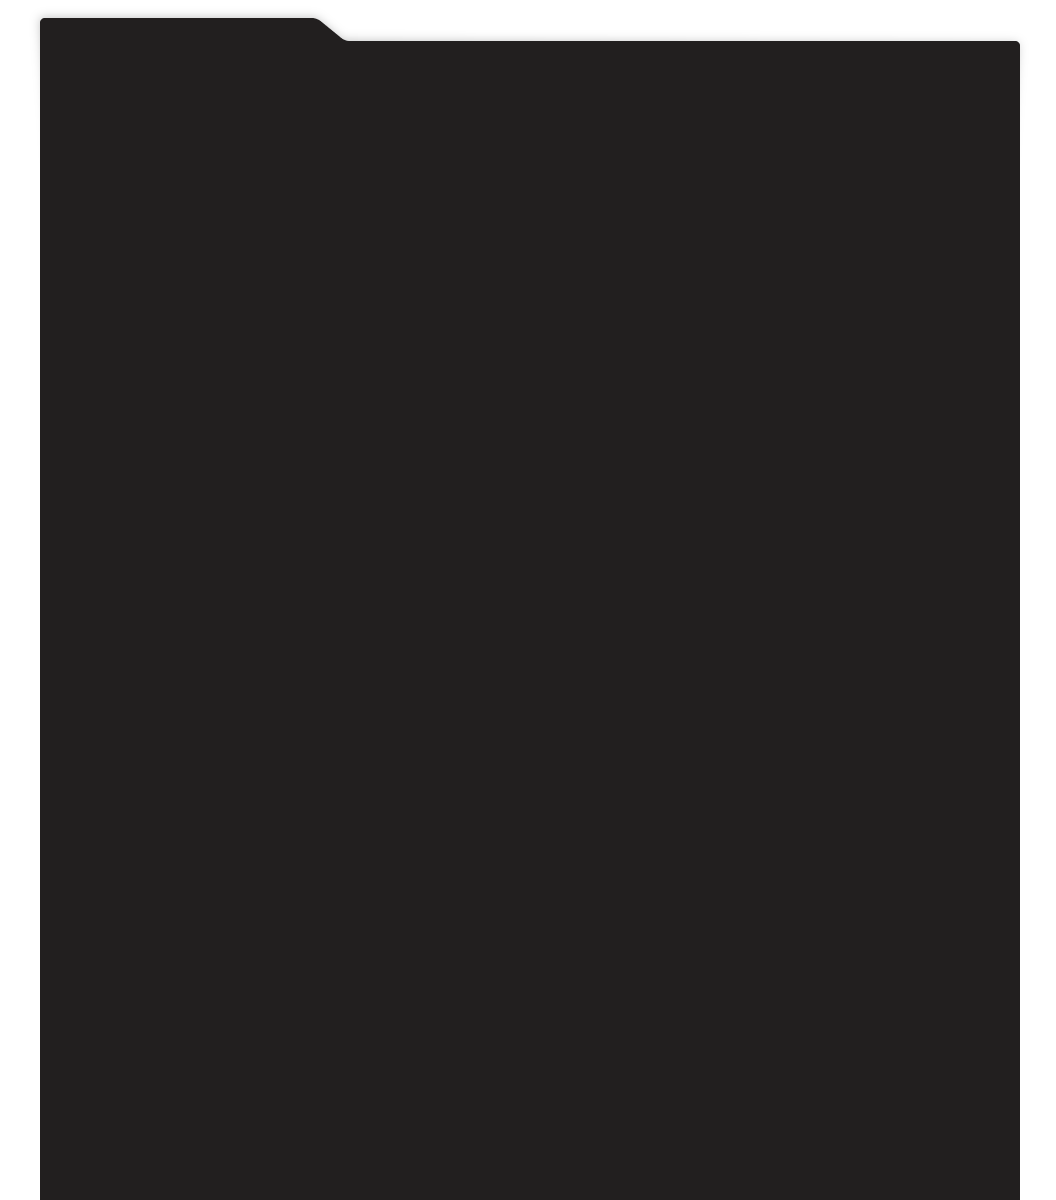
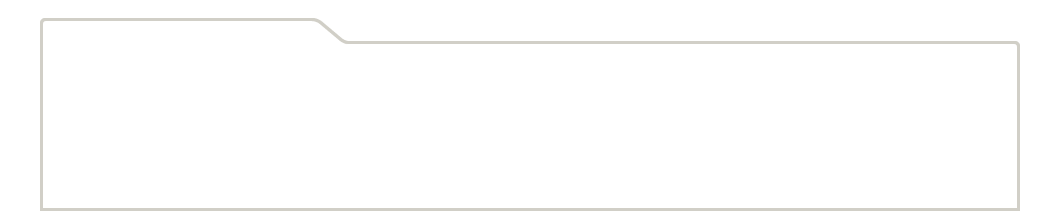
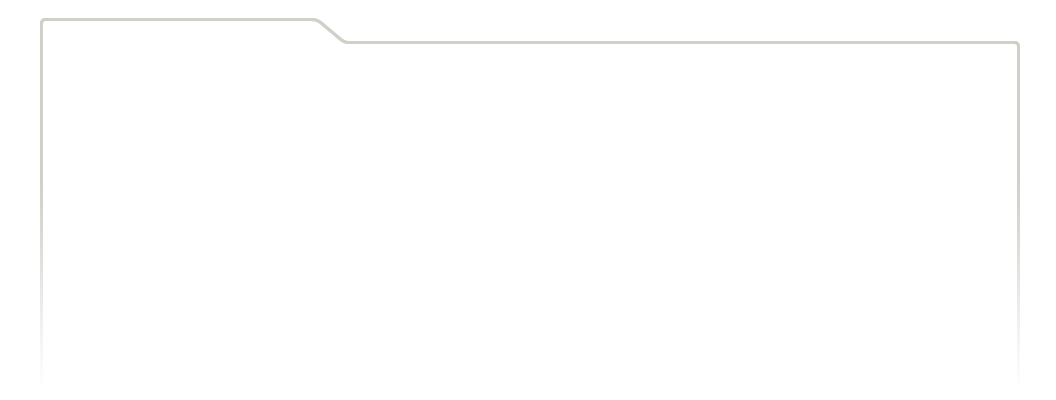
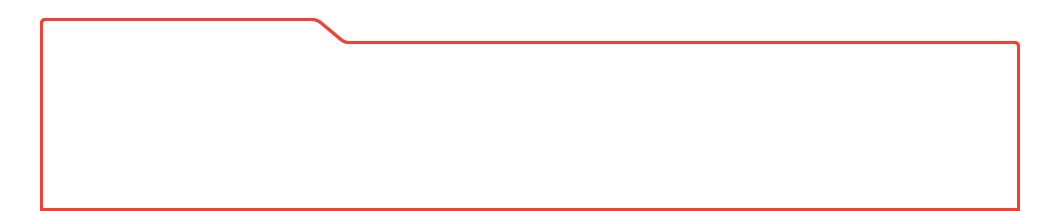
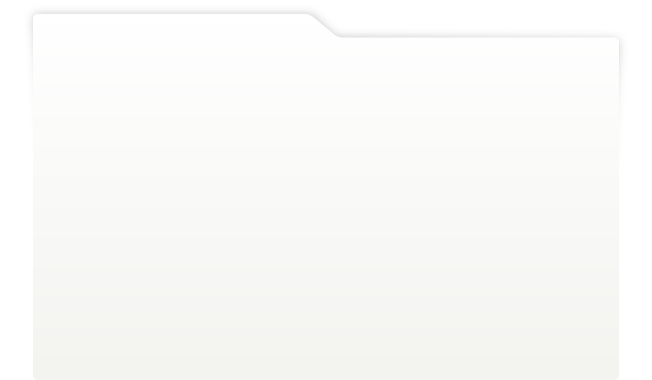
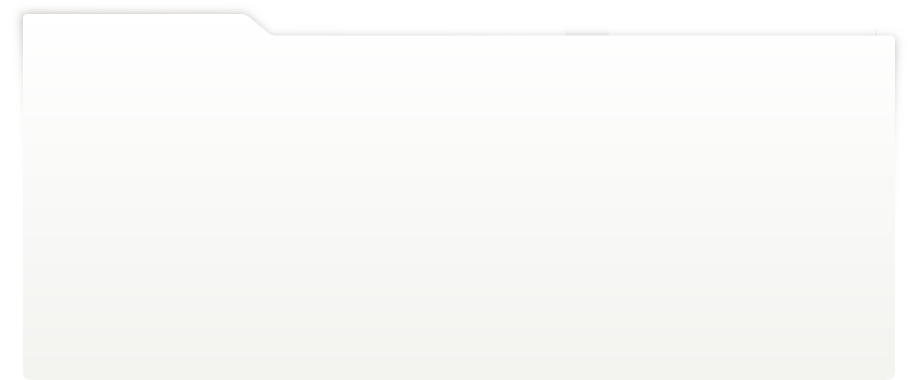
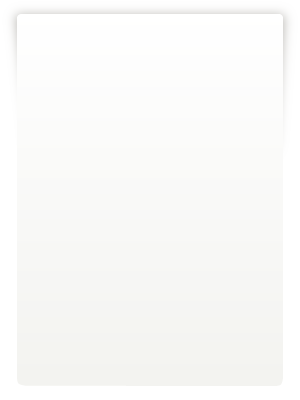
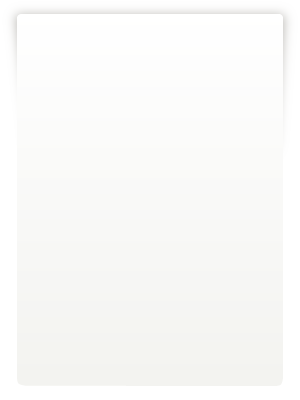
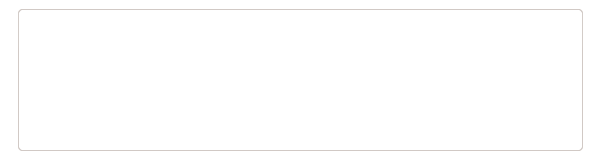
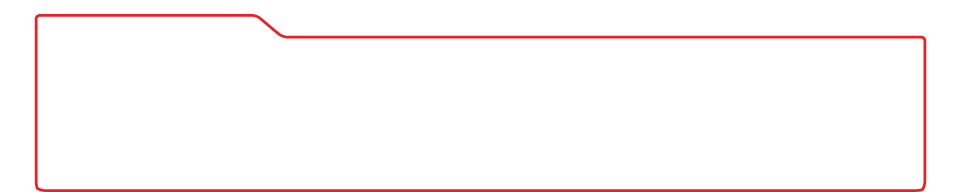
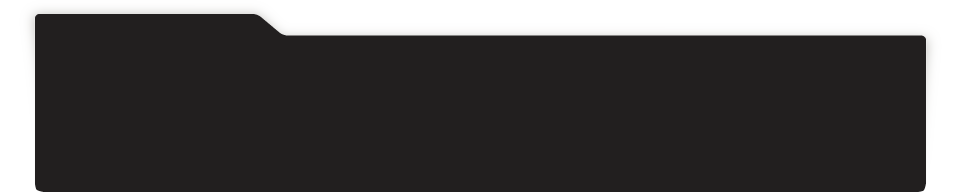
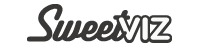
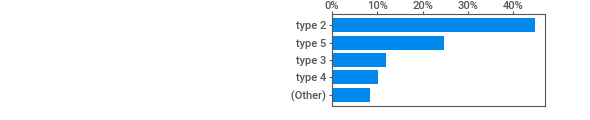
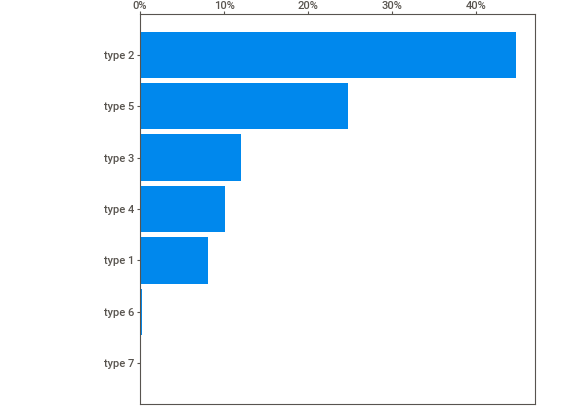
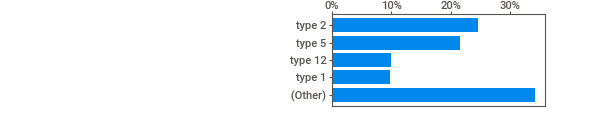
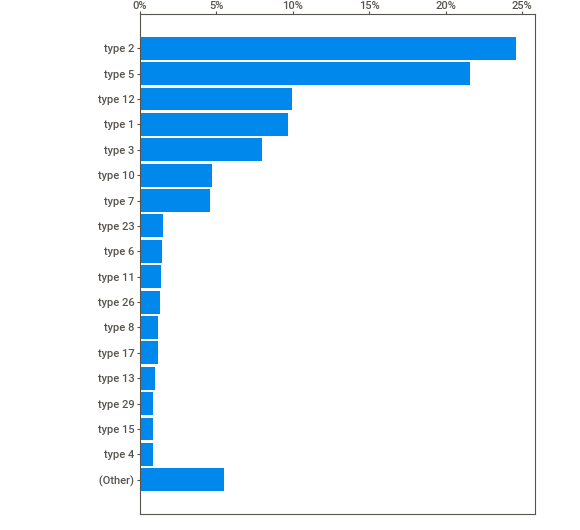
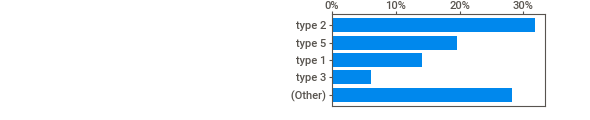
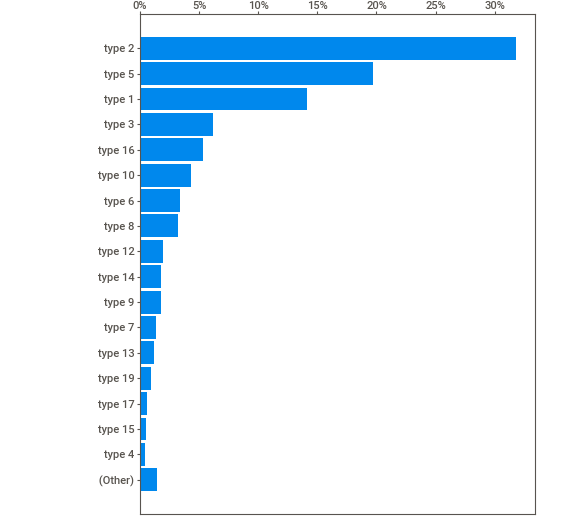
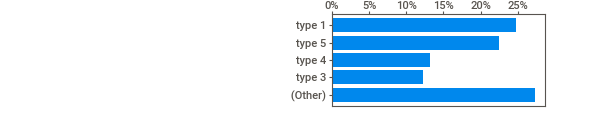
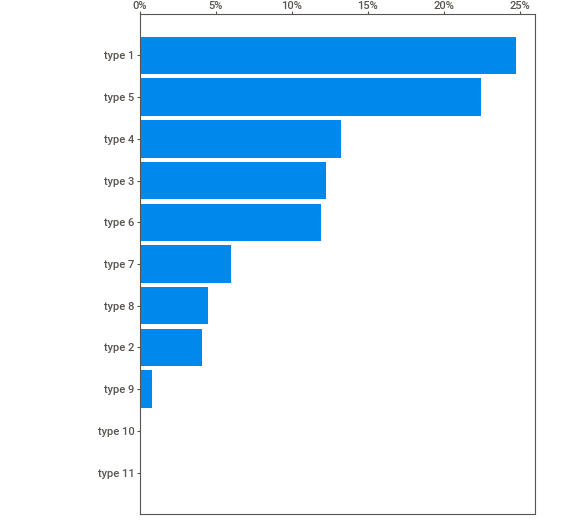
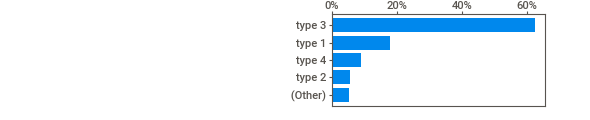
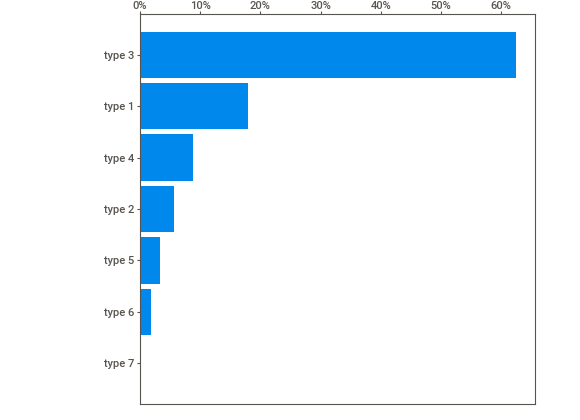
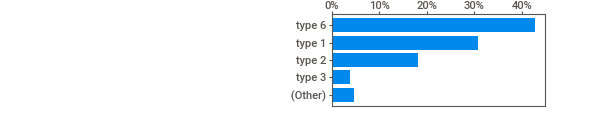
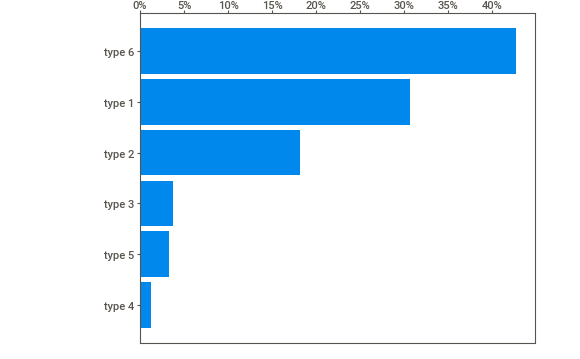
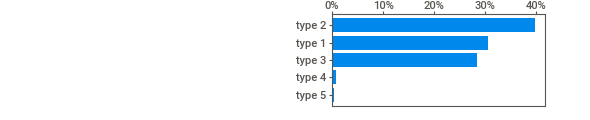
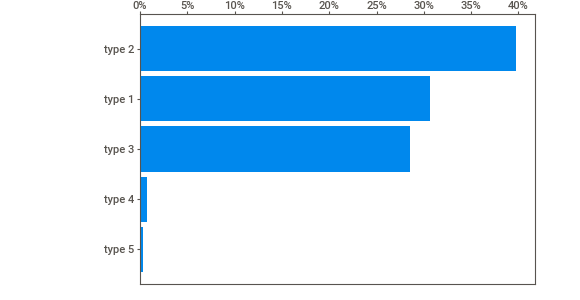
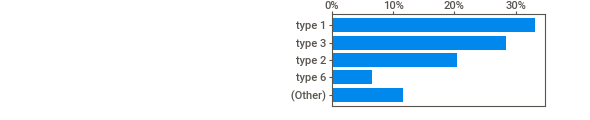
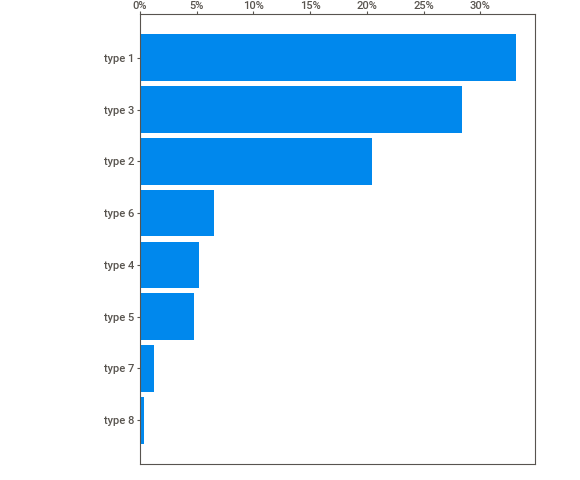
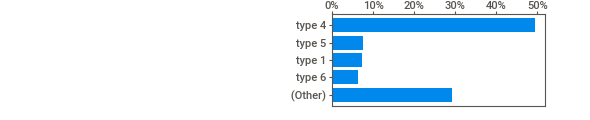
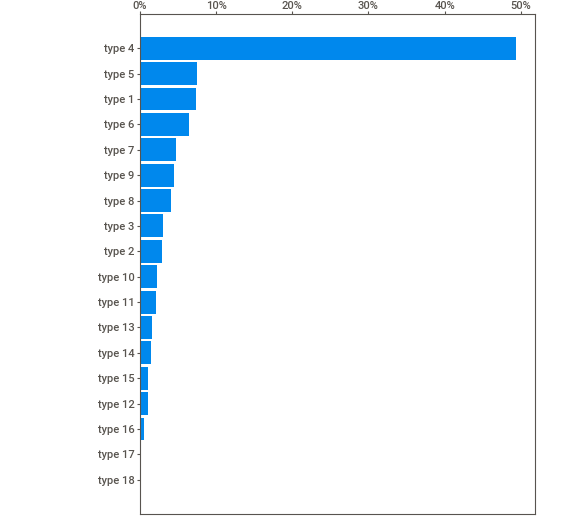
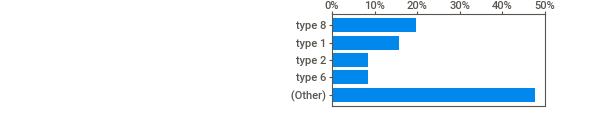
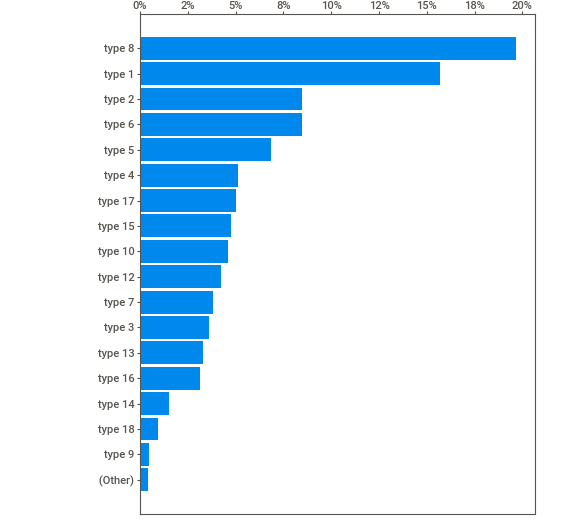
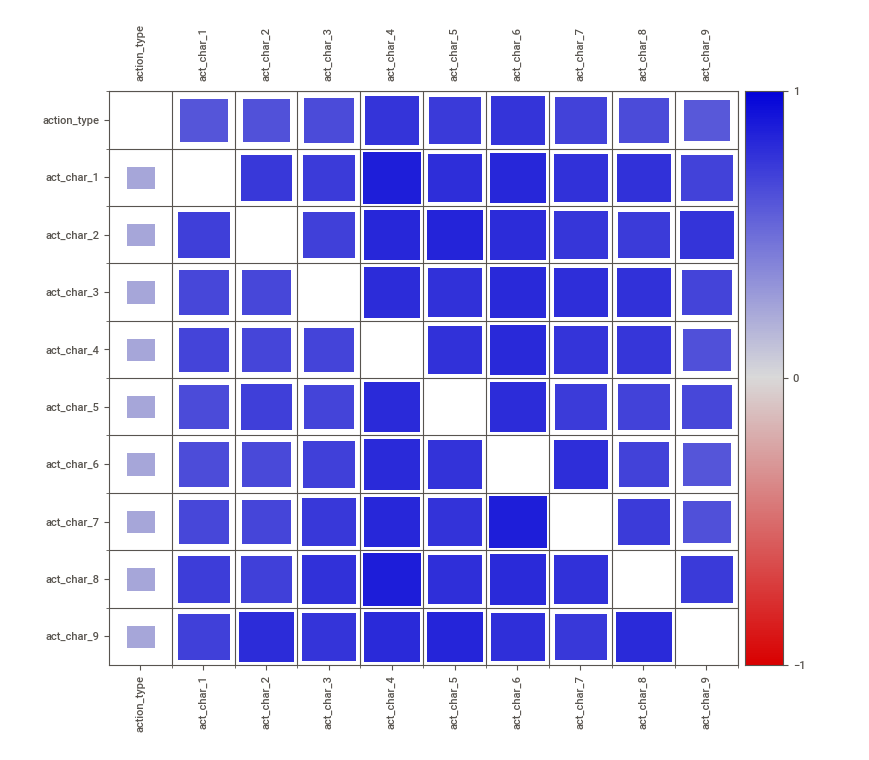
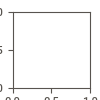

In [29]:
report = sv.analyze(action_test)
report.show_notebook(w='100%', h = 'full')

Так как тип операции 'type 1' оотличается по характеристикам от других операций, то разделим датафреймы на 2 части.

In [23]:
action_train_1 = action_train[action_train['action_type'] == 'type 1']
action_train_1.head(2)

person_id    action_id   act_date action_type act_char_1 act_char_2  \
52   ppl_100025    act1_9923 2022-11-25      type 1     type 3     type 5   
105  ppl_100033  act1_198174 2022-07-26      type 1    type 36    type 11   

    act_char_3 act_char_4 act_char_5 act_char_6 act_char_7 act_char_8  \
52      type 1     type 1     type 6     type 3     type 3     type 6   
105     type 5     type 1     type 6     type 1     type 1     type 4   

    act_char_9 act_char_10  result  
52      type 8         NaN       0  
105     type 1         NaN       0

In [24]:
action_train_1 = action_train_1.drop(['action_type', 'act_char_10'], axis = 1)

In [25]:
action_test_1 = action_test[action_test['action_type'] == 'type 1']
action_test_1.head(2)

person_id    action_id   act_date action_type act_char_1 act_char_2  \
0  ppl_100004  act1_249281 2022-07-20      type 1     type 5    type 10   
2   ppl_10001  act1_240724 2022-10-14      type 1    type 12     type 1   

  act_char_3 act_char_4 act_char_5 act_char_6 act_char_7 act_char_8  \
0     type 5     type 1     type 6     type 1     type 1     type 7   
2     type 5     type 4     type 6     type 1     type 1    type 13   

  act_char_9 act_char_10  
0     type 4         NaN  
2    type 10         NaN

In [26]:
action_test_1 = action_test_1.drop(['action_type', 'act_char_10'], axis = 1)

In [27]:
action_train_2 = action_train[action_train['action_type'] != 'type 1']
action_train_2 = action_train_2.drop(['act_char_1', 'act_char_2',
                                      'act_char_3', 'act_char_4',
                                      'act_char_5', 'act_char_6',
                                      'act_char_7', 'act_char_8',
                                      'act_char_9'],
                                      axis = 1)

In [28]:
action_train_2.head(2)

person_id     action_id   act_date action_type act_char_10  result
0   ppl_100  act2_1734928 2023-08-26      type 4     type 76       0
1   ppl_100  act2_2434093 2022-09-27      type 2      type 1       0

In [29]:
action_test_2 = action_test[action_test['action_type'] != 'type 1']
action_test_2 = action_test_2.drop(['act_char_1', 'act_char_2',
                                      'act_char_3', 'act_char_4',
                                      'act_char_5', 'act_char_6',
                                      'act_char_7', 'act_char_8',
                                      'act_char_9'],
                                      axis = 1)

In [30]:
action_test_2.head(2)

person_id     action_id   act_date action_type act_char_10
1  ppl_100004   act2_230855 2022-07-20      type 5    type 682
4   ppl_10001  act2_1043301 2022-10-15      type 5   type 3015

In [31]:
columns_to_change_bn_1 = ['act_char_1', 'act_char_2', 'act_char_8', 'act_char_9']# Список признаков для BinaryEncoding
columns_to_change_ohe_1 = ['act_char_3', 'act_char_4', 'act_char_5', 'act_char_6', 'act_char_7']# Списко признаков для OneHotEncoding

In [32]:
# 'учим' и сразу применяем преобразование к выборке, результат переводим в массив
data_onehot_train_1 = one_hot_encoder.fit_transform(action_train_1[columns_to_change_ohe_1]).toarray()
data_onehot_test_1 = one_hot_encoder.transform(action_test_1[columns_to_change_ohe_1]).toarray()
 
# запишем полученные названия новых колонок в отдельную переменную
column_names = one_hot_encoder.get_feature_names(columns_to_change_ohe_1)

data_onehot_train_1 = pd.DataFrame(data_onehot_train_1, index=action_train_1.index, columns=column_names)
action_train_1 = pd.concat([action_train_1, data_onehot_train_1], axis = 1)
action_train_1 = action_train_1.drop(columns_to_change_ohe_1, axis = 1)

data_onehot_test_1 = pd.DataFrame(data_onehot_test_1, index=action_test_1.index, columns=column_names)
action_test_1 = pd.concat([action_test_1, data_onehot_test_1], axis = 1)
action_test_1 = action_test_1.drop(columns_to_change_ohe_1, axis = 1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [33]:
bin_encoder = ce.BinaryEncoder(cols=columns_to_change_bn_1) # указываем столбцы для кодирования
type_bin_train_1 = bin_encoder.fit_transform(action_train_1[columns_to_change_bn_1])
type_bin_test_1 = bin_encoder.transform(action_test_1[columns_to_change_bn_1])

action_train_1 = pd.concat([action_train_1, type_bin_train_1], axis=1)
action_test_1 = pd.concat([action_test_1, type_bin_test_1], axis=1)

action_train_1 = action_train_1.drop(columns_to_change_bn_1, axis = 1)
action_test_1 = action_test_1.drop(columns_to_change_bn_1, axis = 1)

In [34]:
act_char_10_top16 = action_train_2['act_char_10'].value_counts().nlargest(16)

In [35]:
action_train_2['act_char_10'] = action_train_2['act_char_10'].apply(lambda x: x if x in act_char_10_top16 else 'other')
action_test_2['act_char_10'] = action_test_2['act_char_10'].apply(lambda x: x if x in act_char_10_top16 else 'other')

In [36]:
columns_to_change_ohe_2 = ['act_char_10', 'action_type']# Списко признаков для OneHotEncoding

In [37]:
# 'учим' и сразу применяем преобразование к выборке, результат переводим в массив
data_onehot_train_2 = one_hot_encoder.fit_transform(action_train_2[columns_to_change_ohe_2]).toarray()
data_onehot_test_2 = one_hot_encoder.transform(action_test_2[columns_to_change_ohe_2]).toarray()
 
# запишем полученные названия новых колонок в отдельную переменную
column_names = one_hot_encoder.get_feature_names(columns_to_change_ohe_2)

data_onehot_train_2 = pd.DataFrame(data_onehot_train_2, index=action_train_2.index, columns=column_names)
action_train_2 = pd.concat([action_train_2, data_onehot_train_2], axis = 1)
action_train_2 = action_train_2.drop(columns_to_change_ohe_2, axis = 1)

data_onehot_test_2 = pd.DataFrame(data_onehot_test_2, index=action_test_2.index, columns=column_names)
action_test_2 = pd.concat([action_test_2, data_onehot_test_2], axis = 1)
action_test_2 = action_test_2.drop(columns_to_change_ohe_2, axis = 1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [38]:
action_train_1.shape, action_test_1.shape, action_train_2.shape, action_test_2.shape

((157615, 64), (40092, 63), (2039676, 27), (458595, 26))

Далее к каждой таблице присоединим таблицу PERSON по значению person_id.

In [39]:
action_train_1 = action_train_1.merge(person, on = 'person_id', how = 'left', sort = False)
action_train_2 = action_train_2.merge(person, on = 'person_id', how = 'left', sort = False)
action_test_1 = action_test_1.merge(person, on = 'person_id', how = 'left', sort = False)
action_test_2 = action_test_2.merge(person, on = 'person_id', how = 'left', sort = False)

Получим новые признаки из дат: day_of_week, quarter, days_after_reg.

In [40]:
action_train_1['day_of_week'] = action_train_1['act_date'].dt.dayofweek
action_train_2['day_of_week'] = action_train_2['act_date'].dt.dayofweek
action_test_1['day_of_week'] = action_test_1['act_date'].dt.dayofweek
action_test_2['day_of_week'] = action_test_2['act_date'].dt.dayofweek

In [41]:
action_train_1['quarter'] = action_train_1['act_date'].dt.quarter
action_train_2['quarter'] = action_train_2['act_date'].dt.quarter
action_test_1['quarter'] = action_test_1['act_date'].dt.quarter
action_test_2['quarter'] = action_test_2['act_date'].dt.quarter

In [42]:
action_train_1['days_after_reg'] = (action_train_1['act_date'] - action_train_1['date']).dt.days
action_train_2['days_after_reg'] = (action_train_2['act_date'] - action_train_2['date']).dt.days
action_test_1['days_after_reg'] = (action_test_1['act_date'] - action_test_1['date']).dt.days
action_test_2['days_after_reg'] = (action_test_2['act_date'] - action_test_2['date']).dt.days

In [43]:
columns_to_change_ohe_3 = ['day_of_week', 'quarter']# Списко признаков для OneHotEncoding

In [44]:
# 'учим' и сразу применяем преобразование к выборке, результат переводим в массив
data_onehot_train_1 = one_hot_encoder.fit_transform(action_train_1[columns_to_change_ohe_3]).toarray()
data_onehot_test_1 = one_hot_encoder.transform(action_test_1[columns_to_change_ohe_3]).toarray()
 
# запишем полученные названия новых колонок в отдельную переменную
column_names = one_hot_encoder.get_feature_names(columns_to_change_ohe_3)

data_onehot_train_1 = pd.DataFrame(data_onehot_train_1, index=action_train_1.index, columns=column_names)
action_train_1 = pd.concat([action_train_1, data_onehot_train_1], axis = 1)
action_train_1 = action_train_1.drop(columns_to_change_ohe_3, axis = 1)

data_onehot_test_1 = pd.DataFrame(data_onehot_test_1, index=action_test_1.index, columns=column_names)
action_test_1 = pd.concat([action_test_1, data_onehot_test_1], axis = 1)
action_test_1 = action_test_1.drop(columns_to_change_ohe_3, axis = 1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [45]:
# 'учим' и сразу применяем преобразование к выборке, результат переводим в массив
data_onehot_train_2 = one_hot_encoder.fit_transform(action_train_2[columns_to_change_ohe_3]).toarray()
data_onehot_test_2 = one_hot_encoder.transform(action_test_2[columns_to_change_ohe_3]).toarray()
 
# запишем полученные названия новых колонок в отдельную переменную
column_names = one_hot_encoder.get_feature_names(columns_to_change_ohe_3)

data_onehot_train_2 = pd.DataFrame(data_onehot_train_2, index=action_train_2.index, columns=column_names)
action_train_2 = pd.concat([action_train_2, data_onehot_train_2], axis = 1)
action_train_2 = action_train_2.drop(columns_to_change_ohe_3, axis = 1)

data_onehot_test_2 = pd.DataFrame(data_onehot_test_2, index=action_test_2.index, columns=column_names)
action_test_2 = pd.concat([action_test_2, data_onehot_test_2], axis = 1)
action_test_2 = action_test_2.drop(columns_to_change_ohe_3, axis = 1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [46]:
action_train_1 = action_train_1.drop(['act_date', 'date'], axis = 1)
action_train_2 = action_train_2.drop(['act_date', 'date'], axis = 1)
action_test_1 = action_test_1.drop(['act_date', 'date'], axis = 1)
action_test_2 = action_test_2.drop(['act_date', 'date'], axis = 1)

In [47]:
# инициализируем нормализатор MinMaxScaler
mm_scaler = preprocessing.MinMaxScaler()

# преобразовываем столбец
action_train_1['days_after_reg'] = mm_scaler.fit_transform(action_train_1[['days_after_reg']])
action_test_1['days_after_reg'] = mm_scaler.transform(action_test_1[['days_after_reg']])

In [48]:
# инициализируем нормализатор MinMaxScaler
mm_scaler = preprocessing.MinMaxScaler()

# преобразовываем столбец
action_train_2['days_after_reg'] = mm_scaler.fit_transform(action_train_2[['days_after_reg']])
action_test_2['days_after_reg'] = mm_scaler.transform(action_test_2[['days_after_reg']])

In [49]:
submission = action_test[['action_id', 'person_id']]
submission = submission.drop('person_id', axis = 1)
submission 


action_id
0        act1_249281
1        act2_230855
2        act1_240724
3         act1_83552
4       act2_1043301
...              ...
498682  act2_4367092
498683  act2_4404220
498684   act2_448830
498685   act2_450133
498686   act2_847967

[498687 rows x 1 columns]

### <center> ПОДБОР ГИПЕРПАРАМЕТРОВ

Посмотрим на сбалансированность классов:

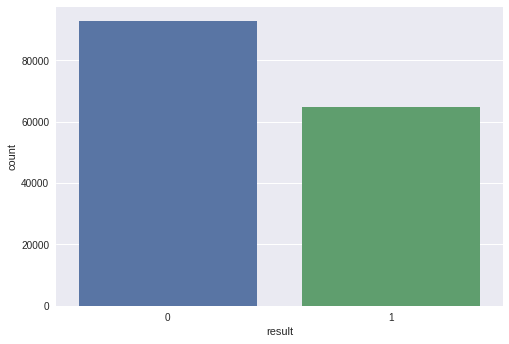

In [50]:
sns.countplot(data=action_train_1, x='result');

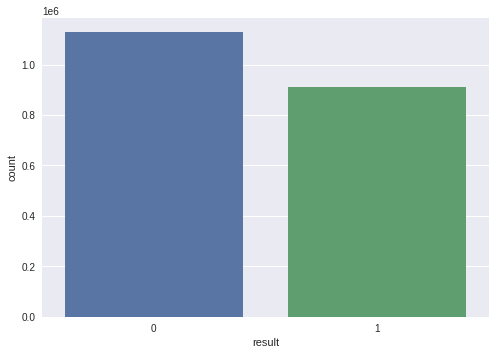

In [51]:
sns.countplot(data=action_train_2, x='result');

In [52]:
action_train_1.head()

person_id    action_id  result  act_char_3_type 1  act_char_3_type 10  \
0  ppl_100025    act1_9923       0                1.0                 0.0   
1  ppl_100033  act1_198174       0                0.0                 0.0   
2  ppl_100033  act1_214090       0                0.0                 0.0   
3  ppl_100033  act1_230588       0                0.0                 0.0   
4  ppl_100033  act1_271874       0                0.0                 0.0   

   act_char_3_type 11  act_char_3_type 2  act_char_3_type 3  \
0                 0.0                0.0                0.0   
1                 0.0                0.0                0.0   
2                 0.0                0.0                0.0   
3                 0.0                0.0                1.0   
4                 0.0                0.0                1.0   

   act_char_3_type 4  act_char_3_type 5  ...  day_of_week_1  day_of_week_2  \
0                0.0                0.0  ...            0.0            0.0   
1                0.0                1.0  ...            1.0            0.0   
2                0.0                0.0  ...            0.0            0.0   
3                0.0                0.0  ...            1.0            0.0   
4                0.0                0.0  ...            1.0            0.0   

   day_of_week_3  day_of_week_4  day_of_week_5  day_of_week_6  quarter_1  \
0            0.0            1.0            0.0            0.0        0.0   
1            0.0            0.0            0.0            0.0        0.0   
2            1.0            0.0            0.0            0.0        0.0   
3            0.0            0.0            0.0            0.0        1.0   
4            0.0            0.0            0.0            0.0        0.0   

   quarter_2  quarter_3  quarter_4  
0        0.0        0.0        1.0  
1        0.0        1.0        0.0  
2        1.0        0.0        0.0  
3        0.0        0.0        0.0  
4        0.0        1.0        0.0  

[5 rows x 159 columns]

In [53]:
action_train_1 = action_train_1.drop('person_id', axis = 1)

In [54]:
y1 = action_train_1['result'] # Наш таргет
X1 = action_train_1.drop(['result', 'action_id'], axis = 1) # Таблица без таргета

Разделяем на тренировочную и валидационную выборки:

In [55]:
X1_train, X1_valid, y1_train, y1_valid = train_test_split(X1, y1, stratify=y1, random_state = 42, test_size = 0.3)

Зафиксируем только метрики, которые были получены без дополнительной настройки, т.е со значениями гиперпараметров, установленных по умолчанию:

Логистическая регрессия:

In [56]:
#Создаем объект класса логистическая регрессия
log_reg = linear_model.LogisticRegression(max_iter = 1000)
#Обучаем модель, минимизируя logloss
log_reg.fit(X1_train, y1_train)
print("accuracy на валидационном наборе: {:.2f}".format(log_reg.score(X1_valid, y1_valid)))
y1_valid_pred = log_reg.predict(X1_valid)
print('f1_score на валидационном наборе: {:.2f}'.format(metrics.f1_score(y1_valid, y1_valid_pred)))

accuracy на валидационном наборе: 0.86
f1_score на валидационном наборе: 0.85


Дерево решений:

In [57]:
#Создаем объект класса дерево решений
dt = tree.DecisionTreeClassifier(random_state=42)
#Обучаем дерево по алгоритму CARTrint
dt.fit(X1_train, y1_train)
#Выводим значения метрики 
y1_train_pred = dt.predict(X1_train)
print('Train: {:.2f}'.format(metrics.f1_score(y1_train, y1_train_pred)))
y1_valid_pred = dt.predict(X1_valid)
print('Test: {:.2f}'.format(metrics.f1_score(y1_valid, y1_valid_pred)))

Train: 1.00
Test: 0.89


Случайный лес:

In [58]:
#Создаем объект класса случайный лес
rf = ensemble.RandomForestClassifier(random_state=42)

#Обучаем модель
rf.fit(X1_train, y1_train)
#Выводим значения метрики 
y1_train_pred = rf.predict(X1_train)
print('Train: {:.2f}'.format(metrics.f1_score(y1_train, y1_train_pred)))
y1_valid_pred = rf.predict(X1_valid)
print('Test: {:.2f}'.format(metrics.f1_score(y1_valid, y1_valid_pred)))

Train: 1.00
Test: 0.92


### Вывод: лучший результат показывает алгоритм Случайный лес.


In [59]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [60]:
from sklearn.model_selection import cross_val_score
import optuna

In [69]:
def optuna_rf(trial):
    # задаем пространства поиска гиперпараметров
    n_estimators = trial.suggest_int('n_estimators', 100, 500)
    max_depth = trial.suggest_int('max_depth', 15, 30)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 15)
    criterion=trial.suggest_categorical('criterion', ['gini', 'entropy']) 

    # создаем модель
    model = ensemble.RandomForestClassifier(n_estimators=n_estimators,
                                            max_depth=max_depth,
                                            min_samples_leaf=min_samples_leaf,
                                            random_state=42,
                                            criterion = criterion)
    # обучаем модель
    model.fit(X1_train, y1_train)
    # score = metrics.f1_score(y_train, model.predict(X_train))
    score = cross_val_score(model, X1, y1, cv=5, scoring="f1", n_jobs=-1).mean()

    return score

In [70]:
%%time
# cоздаем объект исследования
# можем напрямую указать, что нам необходимо максимизировать метрику direction="maximize"
study = optuna.create_study(study_name="RandomForestClassifier", direction="maximize")
# ищем лучшую комбинацию гиперпараметров n_trials раз
study.optimize(optuna_rf, n_trials=25)

[I 2022-11-28 13:30:25,075] A new study created in memory with name: RandomForestClassifier
[I 2022-11-28 13:33:30,037] Trial 0 finished with value: 0.8530819853621819 and parameters: {'n_estimators': 223, 'max_depth': 15, 'min_samples_leaf': 9, 'criterion': 'gini'}. Best is trial 0 with value: 0.8530819853621819.
[I 2022-11-28 13:40:02,825] Trial 1 finished with value: 0.8578013379144602 and parameters: {'n_estimators': 445, 'max_depth': 20, 'min_samples_leaf': 5, 'criterion': 'gini'}. Best is trial 1 with value: 0.8578013379144602.
[I 2022-11-28 13:41:44,408] Trial 2 finished with value: 0.8540252779522886 and parameters: {'n_estimators': 121, 'max_depth': 17, 'min_samples_leaf': 12, 'criterion': 'gini'}. Best is trial 1 with value: 0.8578013379144602.
[I 2022-11-28 13:48:13,381] Trial 3 finished with value: 0.8559207473546753 and parameters: {'n_estimators': 440, 'max_depth': 23, 'min_samples_leaf': 11, 'criterion': 'entropy'}. Best is trial 1 with value: 0.8578013379144602.
[I 2022

CPU times: user 19min 39s, sys: 20.2 s, total: 19min 59s
Wall time: 1h 43min 3s


In [71]:
# выводим результаты на обучающей выборке
print("Наилучшие значения гиперпараметров {}".format(study.best_params))
print("f1_score на обучающем наборе: {:.2f}".format(study.best_value))

Наилучшие значения гиперпараметров {'n_estimators': 244, 'max_depth': 25, 'min_samples_leaf': 2, 'criterion': 'entropy'}
f1_score на обучающем наборе: 0.86


In [72]:
# рассчитаем точность для тестовой выборки
model = ensemble.RandomForestClassifier(**study.best_params,random_state=42)
model.fit(X1_train, y1_train)
y1_train_pred = model.predict(X1_train)
print("accuracy на тестовом наборе: {:.2f}".format(model.score(X1_valid, y1_valid)))
y1_valid_pred = model.predict(X1_valid)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y1_valid, y1_valid_pred)))

accuracy на тестовом наборе: 0.92
f1_score на тестовом наборе: 0.91


Модель улучшить не удалось, значит значения параметров по умолчанию оптимальны

Построим ROC-кривую нашей модели

RandomForestClassifier: ROC AUC=0.983


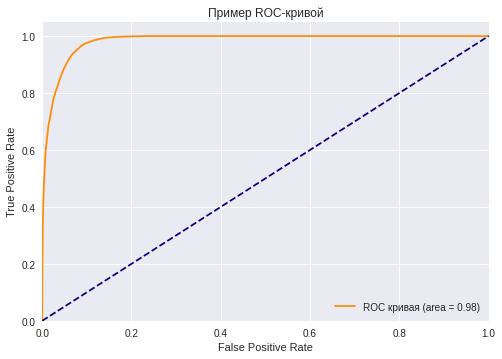

In [61]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

#Создаем объект класса случайный лес
rf = ensemble.RandomForestClassifier(random_state=42)

#Обучаем модель
rf.fit(X1_train, y1_train)

y1_valid_pred_proba = rf.predict_proba(X1_valid)
# сохраняем вероятности только для положительного исхода
y1_valid_pred_proba = y1_valid_pred_proba[:, 1]
# рассчитываем ROC AUC
rf_auc = roc_auc_score(y1_valid, y1_valid_pred_proba)
print('RandomForestClassifier: ROC AUC=%.3f' % (rf_auc))
# рассчитываем roc-кривую
fpr, tpr, treshold = roc_curve(y1_valid, y1_valid_pred_proba)
roc_auc = auc(fpr, tpr)
# строим график
plt.plot(fpr, tpr, color='darkorange',
         label='ROC кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Пример ROC-кривой')
plt.legend(loc="lower right")
plt.show()

In [62]:
action_test_1.head(2)

person_id    action_id  act_char_3_type 1  act_char_3_type 10  \
0  ppl_100004  act1_249281                0.0                 0.0   
1   ppl_10001  act1_240724                0.0                 0.0   

   act_char_3_type 11  act_char_3_type 2  act_char_3_type 3  \
0                 0.0                0.0                0.0   
1                 0.0                0.0                0.0   

   act_char_3_type 4  act_char_3_type 5  act_char_3_type 6  ...  \
0                0.0                1.0                0.0  ...   
1                0.0                1.0                0.0  ...   

   day_of_week_1  day_of_week_2  day_of_week_3  day_of_week_4  day_of_week_5  \
0            0.0            1.0            0.0            0.0            0.0   
1            0.0            0.0            0.0            1.0            0.0   

   day_of_week_6  quarter_1  quarter_2  quarter_3  quarter_4  
0            0.0        0.0        0.0        1.0        0.0  
1            0.0        0.0        0.0        0.0        1.0  

[2 rows x 158 columns]

In [63]:
action_test_1 = action_test_1.drop('person_id', axis = 1)

In [64]:
X1_test = action_test_1.drop('action_id', axis = 1)

In [65]:
action_test_1['result'] = rf.predict_proba(X1_test)[:, 1]
action_test_1['result']

0        0.41
1        0.85
2        0.73
3        0.00
4        0.00
         ... 
40087    0.00
40088    0.61
40089    0.80
40090    0.31
40091    0.90
Name: result, Length: 40092, dtype: float64

In [66]:
submission = submission.merge(action_test_1[['action_id','result']], on = 'action_id', how = 'left')
submission

action_id  result
0        act1_249281    0.41
1        act2_230855     NaN
2        act1_240724    0.85
3         act1_83552    0.73
4       act2_1043301     NaN
...              ...     ...
498682  act2_4367092     NaN
498683  act2_4404220     NaN
498684   act2_448830     NaN
498685   act2_450133     NaN
498686   act2_847967     NaN

[498687 rows x 2 columns]

In [67]:
action_train_2 = action_train_2.drop('person_id', axis = 1)

In [68]:
action_train_2 = action_train_2.sample(frac = 0.7, replace = False, random_state = 42)

In [69]:
y2 = action_train_2['result'] # Наш таргет
X2 = action_train_2.drop(['result', 'action_id'], axis = 1) # Таблица без таргета

Разделяем на тренировочную и валидационную выборки:

In [70]:
X2_train, X2_valid, y2_train, y2_valid = train_test_split(X2, y2, stratify=y2, random_state = 42, test_size = 0.3)

Зафиксируем только метрики, которые были получены без дополнительной настройки, т.е со значениями гиперпараметров, установленных по умолчанию:

Логистическая регрессия:

In [71]:
#Создаем объект класса логистическая регрессия
log_reg = linear_model.LogisticRegression(max_iter = 1000)
#Обучаем модель, минимизируя logloss
log_reg.fit(X2_train, y2_train)
print("accuracy на валидационном наборе: {:.2f}".format(log_reg.score(X2_valid, y2_valid)))
y2_valid_pred = log_reg.predict(X2_valid)
print('f1_score на валидационном наборе: {:.2f}'.format(metrics.f1_score(y2_valid, y2_valid_pred)))

accuracy на валидационном наборе: 0.85
f1_score на валидационном наборе: 0.85


Дерево решений:

In [72]:
#Создаем объект класса дерево решений
dt = tree.DecisionTreeClassifier(random_state=42)
#Обучаем дерево по алгоритму CARTrint
dt.fit(X2_train, y2_train)
#Выводим значения метрики 
y2_train_pred = dt.predict(X2_train)
print('Train: {:.2f}'.format(metrics.f1_score(y2_train, y2_train_pred)))
y2_valid_pred = dt.predict(X2_valid)
print('Test: {:.2f}'.format(metrics.f1_score(y2_valid, y2_valid_pred)))

Train: 1.00
Test: 0.98


Случайный лес:

In [74]:
#Создаем объект класса случайный лес
rf = ensemble.RandomForestClassifier(random_state=42)

#Обучаем модель
rf.fit(X2_train, y2_train)
#Выводим значения метрики 
y2_train_pred = rf.predict(X2_train)
print('Train: {:.2f}'.format(metrics.f1_score(y2_train, y2_train_pred)))
y2_valid_pred = rf.predict(X2_valid)
print('Test: {:.2f}'.format(metrics.f1_score(y2_valid, y2_valid_pred)))

Train: 1.00
Test: 0.98


RandomForestClassifier: ROC AUC=0.979


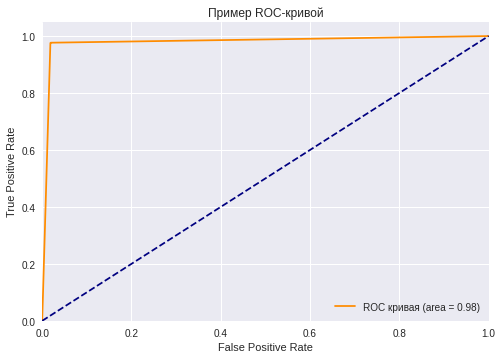

In [75]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

#Создаем объект класса дерево решений
dt = tree.DecisionTreeClassifier(random_state=42)

#Обучаем модель
dt.fit(X2_train, y2_train)

y2_valid_pred_proba = dt.predict_proba(X2_valid)
# сохраняем вероятности только для положительного исхода
y2_valid_pred_proba = y2_valid_pred_proba[:, 1]
# рассчитываем ROC AUC
dt_auc = roc_auc_score(y2_valid, y2_valid_pred_proba)
print('RandomForestClassifier: ROC AUC=%.3f' % (dt_auc))
# рассчитываем roc-кривую
fpr, tpr, treshold = roc_curve(y2_valid, y2_valid_pred_proba)
roc_auc = auc(fpr, tpr)
# строим график
plt.plot(fpr, tpr, color='darkorange',
         label='ROC кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Пример ROC-кривой')
plt.legend(loc="lower right")
plt.show()

In [76]:
action_test_2 = action_test_2.drop('person_id', axis = 1)

In [77]:
X2_test = action_test_2.drop('action_id', axis = 1)

In [78]:
action_test_2['result2'] = dt.predict_proba(X2_test)[:, 1]
action_test_2['result2']

0         0.0
1         1.0
2         1.0
3         1.0
4         1.0
         ... 
458590    0.0
458591    0.0
458592    0.0
458593    0.0
458594    0.0
Name: result2, Length: 458595, dtype: float64

In [79]:
submission = submission.merge(action_test_2[['action_id','result2']], on = 'action_id', how = 'left')
submission

action_id  result  result2
0        act1_249281    0.41      NaN
1        act2_230855     NaN      0.0
2        act1_240724    0.85      NaN
3         act1_83552    0.73      NaN
4       act2_1043301     NaN      1.0
...              ...     ...      ...
498682  act2_4367092     NaN      0.0
498683  act2_4404220     NaN      0.0
498684   act2_448830     NaN      0.0
498685   act2_450133     NaN      0.0
498686   act2_847967     NaN      0.0

[498687 rows x 3 columns]

In [80]:
submission['result'] = submission['result'].fillna(submission['result2'])
submission

action_id  result  result2
0        act1_249281    0.41      NaN
1        act2_230855    0.00      0.0
2        act1_240724    0.85      NaN
3         act1_83552    0.73      NaN
4       act2_1043301    1.00      1.0
...              ...     ...      ...
498682  act2_4367092    0.00      0.0
498683  act2_4404220    0.00      0.0
498684   act2_448830    0.00      0.0
498685   act2_450133    0.00      0.0
498686   act2_847967    0.00      0.0

[498687 rows x 3 columns]

In [81]:
submission = submission.drop('result2', axis = 1)
submission

action_id  result
0        act1_249281    0.41
1        act2_230855    0.00
2        act1_240724    0.85
3         act1_83552    0.73
4       act2_1043301    1.00
...              ...     ...
498682  act2_4367092    0.00
498683  act2_4404220    0.00
498684   act2_448830    0.00
498685   act2_450133    0.00
498686   act2_847967    0.00

[498687 rows x 2 columns]

In [82]:
submission.to_csv('submission.csv')